## Step 1: Inserting Libaries

In [1]:
# Importing Libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Library to visualise missing values

## !pip install missingno
import missingno as msno

from matplotlib import style
plt.style.use('seaborn')

## Step 2: Reading and Understanding the Data

In [2]:
# File Reading
Reading_df = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Reading the data file
# from google.colab import drive
# drive.mount('/content/drive')

# Reading_df = pd.read_csv("/content/drive/MyDrive/Data Science/Case Study - Telecom Churn (Machine Learning 2)/telecom_churn_data.csv")

In [4]:
# Shape of Data
Reading_df.shape

(99999, 226)

In [5]:
# First 5 columns
Reading_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
# Last 5 columns
Reading_df.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

In [7]:
# Checking Dtypes
Reading_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Numerical Deatils
Reading_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Step 3: Cleaning Data

### 3.1 Handling Missing Values

In [9]:
## Checking NUll values
Cleaning_df = Reading_df.copy()
Cleaning_df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
## Checking Missing values Percentage (%)
Cleaning_df_percent_missing = Cleaning_df.isnull().sum() * 100 / len(Cleaning_df.index)
Cleaning_df_percent_missing.sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

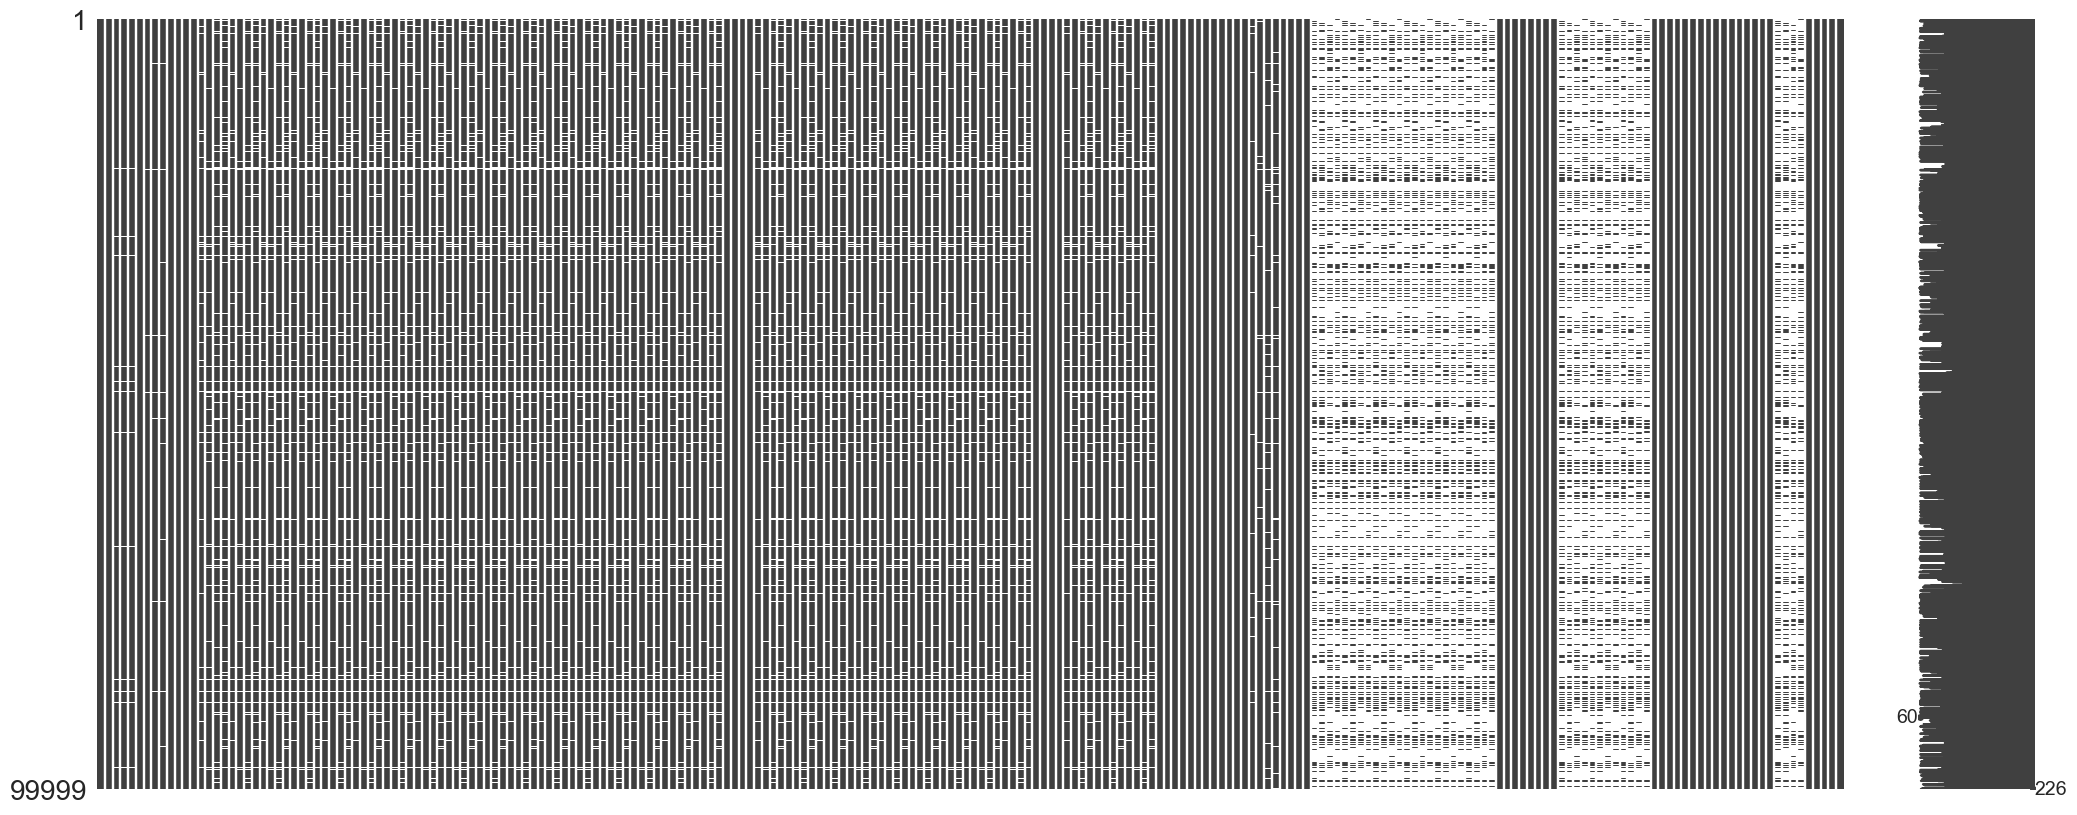

In [11]:
# Missing value using Matrix
msno.matrix(Reading_df)
plt.show()

> It has lots of missing values. Dropping columns which have more than 50 percentage of Null Values

In [12]:
# Checking columns more than 50 percent
Dropping_columns = Cleaning_df.columns[(100 * Cleaning_df.isnull().mean()) > 50]
Dropping_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [13]:
# Dropping columns more than 30 percent
Cleaning_df=Cleaning_df.drop(Dropping_columns,axis=1)
Cleaning_df.shape

(99999, 186)

In [14]:
## Checking Missing values Percentage (%) after Dropping
Cleaning_df_percent_missing = Cleaning_df.isnull().sum() * 100 / len(Cleaning_df)

## Filtering values to only see values more than 0
filtered = Cleaning_df_percent_missing[Cleaning_df_percent_missing > 0]
filtered.sort_values(ascending=False)

loc_og_t2f_mou_9        7.745077
loc_og_t2t_mou_9        7.745077
std_ic_t2o_mou_9        7.745077
loc_og_mou_9            7.745077
roam_og_mou_9           7.745077
loc_ic_t2f_mou_9        7.745077
spl_ic_mou_9            7.745077
std_og_t2f_mou_9        7.745077
og_others_9             7.745077
roam_ic_mou_9           7.745077
std_og_t2m_mou_9        7.745077
loc_og_t2m_mou_9        7.745077
std_og_t2t_mou_9        7.745077
loc_ic_t2m_mou_9        7.745077
loc_og_t2c_mou_9        7.745077
loc_ic_t2t_mou_9        7.745077
std_ic_t2m_mou_9        7.745077
std_ic_mou_9            7.745077
spl_og_mou_9            7.745077
loc_ic_mou_9            7.745077
offnet_mou_9            7.745077
std_ic_t2f_mou_9        7.745077
ic_others_9             7.745077
isd_og_mou_9            7.745077
onnet_mou_9             7.745077
std_og_mou_9            7.745077
isd_ic_mou_9            7.745077
std_og_t2c_mou_9        7.745077
std_ic_t2t_mou_9        7.745077
isd_og_mou_8            5.378054
std_ic_mou

### Removing unwanted columns

In [15]:
# List and drop the date columns
date_cols = [col for col in Cleaning_df.columns if 'date' in col]
Cleaning_df.drop(date_cols, axis=1, inplace=True)

# Print the dropped date columns
print("Dropped date columns:", date_cols)
print("Shape:", Cleaning_df.shape)

Dropped date columns: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
Shape: (99999, 178)


### Filter the High value customers by sum

In [16]:
# Calculate the average recharge amount for months 6 and 7
Cleaning_df['avg_rech_amt_6_7'] = (Cleaning_df['total_rech_amt_6'] + Cleaning_df['total_rech_amt_7']) / 2

# Find the 70th percentile of the average recharge amount for months 6 and 7
quantile_seventieth_percentile = Cleaning_df['avg_rech_amt_6_7'].quantile(0.7)

# Filter the DataFrame to keep only rows where the average recharge amount for months 6 and 7 is greater than or equal to the 70th percentile
Cleaning_df = Cleaning_df[Cleaning_df['avg_rech_amt_6_7'] >= quantile_seventieth_percentile]

# Display the first few rows of the filtered DataFrame
Cleaning_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.

In [17]:
quantile_seventieth_percentile

368.5

In [18]:
print("Shape:", Cleaning_df.shape)

Shape: (30011, 179)


In [19]:
## Rows and columns percentage after Filtering and deleting more than 50 percent of null values coulumns

## reading_df is the orginal dataset
retained = round((Cleaning_df.shape[0] / Reading_df.shape[0]) *100 ,2)
retained_df= round((Cleaning_df.shape[1] / Reading_df.shape[1]) *100 ,2)


print(f"Rows Retained Percentage: {retained}")
print(f"Columns Retained Percentage: {retained_df}")

Rows Retained Percentage: 30.01
Columns Retained Percentage: 79.2


### Handling data missing rows

In [20]:
# Calculate the threshold for missing values
cutoff = len(Cleaning_df.columns) // 2

# Filter rows with missing values exceeding the threshold
Row_Missing = Cleaning_df[Cleaning_df.isnull().sum(axis=1) > cutoff]

# Drop rows with missing values exceeding the threshold
Cleaning_df = Cleaning_df.drop(Row_Missing.index)

# Print the shape of the DataFrame after dropping rows
print("Shape of Dataset:", Cleaning_df.shape)

Shape of Dataset: (29897, 179)


In [21]:
# Percentage of missing values in each column
Null_percentage = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
A = Null_percentage[Null_percentage > 0].to_frame(name='null').sort_values(by='null', ascending=False)
A.head(10)

null
ic_others_9       5.32
og_others_9       5.32
loc_ic_mou_9      5.32
loc_ic_t2f_mou_9  5.32
loc_og_t2f_mou_9  5.32
loc_ic_t2m_mou_9  5.32
loc_ic_t2t_mou_9  5.32
loc_og_t2c_mou_9  5.32
loc_og_mou_9      5.32
loc_og_t2t_mou_9  5.32

> It appears that the Minutes of Usage (MOU) for all call types in the month of September (9) are uniformly missing in certain records.

> We need to investigate the records where MOU values for September (9) are missing across all call types.

In [22]:
# Extracting the columns with missing values for MOU in September (9)
Missing_values_532 = A[A['null'] == 5.32].index.tolist()

# the list of columns
print(Missing_values_532)

['ic_others_9', 'og_others_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'loc_og_t2t_mou_9', 'spl_og_mou_9', 'isd_og_mou_9', 'std_og_t2t_mou_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'std_ic_t2m_mou_9', 'roam_ic_mou_9', 'spl_ic_mou_9', 'std_ic_t2o_mou_9', 'isd_ic_mou_9', 'onnet_mou_9', 'roam_og_mou_9', 'offnet_mou_9']


In [23]:
# Columns with MOU values for September (9) that are all null
cols_9 = [
    'loc_og_t2m_mou_9','std_ic_t2o_mou_9', 'loc_ic_t2f_mou_9', 'roam_og_mou_9',
    'std_ic_t2m_mou_9','loc_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_mou_9',
    'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_ic_mou_9',
    'loc_ic_t2m_mou_9', 'std_og_t2m_mou_9', 'loc_ic_t2t_mou_9', 'std_og_t2f_mou_9',
    'std_og_t2c_mou_9', 'og_others_9', 'std_og_mou_9', 'spl_og_mou_9',
    'std_ic_t2f_mou_9', 'isd_og_mou_9', 'std_ic_mou_9', 'offnet_mou_9',
    'isd_ic_mou_9', 'ic_others_9', 'onnet_mou_9','spl_ic_mou_9']

# records lof MOU values for September (9) which are null
mou_9 = Cleaning_df[Cleaning_df[cols_9].isnull().all(axis=1)]

# Shape of data
print("Shape of Mou value (September):", mou_9.shape)

Shape of Mou value (September): (1590, 179)


In [24]:
# Printing first three data
mou_9.head(3)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   

       arpu_6    arpu_7    arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  \
7    1069.180  1349.850  3171.480   500.0        57.84        54.68   
97    374.863   294.023   183.043     0.0       433.59       415.66   
111   596.301   146.073     0.000     0.0        55.19         3.26   

     onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7          52.29          NaN        453.43        567.16        325.91   
97        221.06          NaN         74.54         43.66         31.86   
111          NaN          NaN         45.51         12.34           NaN   

     offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7             NaN          16.23          33.49          31.64            NaN   
97            NaN           0.00           0.00           6.16            NaN   
111           NaN           0.00           0.00            NaN            NaN   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            23.74          12.59          38.06            NaN   
97            0.00           0.00          23.91            NaN   
111           0.00           0.00            NaN            NaN   

     loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7               51.39             31.38             40.28               NaN   
97               2.83             16.19              9.73               NaN   
111             55.19              3.26               NaN               NaN   

     loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7              308.63            447.38            162.28               NaN   
97              16.99             23.14             17.79               NaN   
111             43.83             12.34               NaN               NaN   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7               62.13             55.14             53.23               NaN   
97               3.54              1.46              1.83               NaN   
111              0.00              0.00               NaN               NaN   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                 0.0               0.0               0.0               NaN   
97                0.4               0.0               0.0               NaN   
111               0.0               0.0               NaN               NaN   

     loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7          422.16        533.91        255.79           NaN              4.30   
97          23.38         40.81         29.36           NaN            430.76   
111         99.03         15.61           NaN           NaN              0.00   

     std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
7               23.29             12.01               NaN             49.89   
97             399.46            191.31               NaN             53.59   
111              0.00               NaN               NaN              0.00   

     std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
7               31.76             49.14               NaN              6.66   
97              13.81              8.33               NaN              0.00   
111              0.00               NaN               NaN              1.30   

     std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
7               20.08             16.68               NaN               0.0   
97               0.00              0.00               NaN               0.0   
111              0.00               

> As a result dropping data which are null in Mou (spetmber)

In [25]:
## Dropping mou_9
Cleaning_df = Cleaning_df.drop(mou_9.index)

print("Shape of Data after Dropping Columns:", Cleaning_df.shape)

Shape of Data after Dropping Columns: (28307, 179)


In [26]:
# Percentage of missing values in each column after dropping
Null_percentage = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
B = Null_percentage[Null_percentage > 0].to_frame(name='null').sort_values(by='null', ascending=False)

B.head(5)

null
ic_others_8       0.55
og_others_8       0.55
std_og_t2t_mou_8  0.55
loc_ic_t2f_mou_8  0.55
loc_ic_t2t_mou_8  0.55

> It appears that the Minutes of Usage (MOU) for all call types in the month of August (8) are uniformly missing in certain records.

> We need to investigate the records where MOU values for August (8) are missing across all call types

In [27]:
August_Missing_values = B[B['null'] == 0.55].index.tolist()

# Extracting records with all null MOU values for August(8)
August_records = Cleaning_df[Cleaning_df[August_Missing_values].isnull().all(axis=1)]

print(August_records.shape)

(157, 179)


In [28]:
## Displaying Few columns
August_records.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
375      7002252754        109             0.0             0.0   
578      7000248548        109             0.0             0.0   
788      7000636808        109             0.0             0.0   
1802     7000516213        109             0.0             0.0   
4837     7002192662        109             0.0             0.0   
5111     7001696021        109             0.0             0.0   
5221     7000070433        109             0.0             0.0   
6520     7002048352        109             0.0             0.0   
7057     7000690557        109             0.0             0.0   
7229     7000027958        109             0.0             0.0   

      loc_ic_t2o_mou    arpu_6    arpu_7  arpu_8    arpu_9  onnet_mou_6  \
375              0.0   580.477   111.878   0.000   378.881       249.43   
578              0.0   569.612   237.289   0.000     4.440       718.01   
788              0.0   532.742   546.756   0.000   269.274      1173.39   
1802             0.0   810.455     0.000   0.000     0.000        91.33   
4837             0.0   649.150   149.572   0.000     0.250      1354.24   
5111             0.0   360.232   532.158  96.904   366.272       106.58   
5221             0.0   979.204   180.139   1.000   -13.904      2588.44   
6520             0.0     0.000  1019.934   0.000  1496.645          NaN   
7057             0.0  1447.908   896.599   1.500    66.843      2728.86   
7229             0.0   264.685   643.935   0.000    72.730        21.71   

      onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
375         39.64          NaN       245.06         62.24         37.24   
578        212.73          NaN         0.00        487.06        139.71   
788        891.83          NaN       149.34         61.59        137.14   
1802          NaN          NaN         0.00       1371.04           NaN   
4837        85.13          NaN         0.43         50.63         37.13   
5111        77.79          NaN        54.41        177.81        210.24   
5221       223.46          NaN         0.89        129.49         35.38   
6520        17.79          NaN        62.81           NaN        115.23   
7057      1633.36          NaN        29.23        604.86        510.41   
7229        32.33          NaN         1.41         35.51         64.26   

      offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
375            NaN        144.53          25.49          19.43            NaN   
578            NaN          1.26           0.00           2.01            NaN   
788            NaN        428.36           0.00           1.48            NaN   
1802           NaN          0.00           1.21            NaN            NaN   
4837           NaN          0.00           0.00          12.84            NaN   
5111           NaN         47.10           0.00           1.00            NaN   
5221           NaN          0.00           0.00           1.10            NaN   
6520           NaN         87.93            NaN          51.21            NaN   
7057           NaN         31.76           0.00          16.29            NaN   
7229           NaN          2.86           0.00          22.83            NaN   

      roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
375            0.00         312.59          78.58            NaN   
578            6.43           0.00           6.30            NaN   
788            0.00           0.00          14.43            NaN   
1802           0.00          11.23            NaN            NaN   
4837           1.25           0.00          44.78            NaN   
5111           0.00           0.00           1.73            NaN   
5221           0.93           0.00          82.64            NaN   
6520         107.19            NaN         188.21            NaN   
7057          10.43           0.00          39.91            NaN   
7229           6.53           0.00           2.08      

> As a result dropping data which are null in Mou (August)

In [29]:
## Dropping mou_8
Cleaning_df = Cleaning_df.drop(August_records.index)

print("Shape of Data after Dropping Columns:", Cleaning_df.shape)

Shape of Data after Dropping Columns: (28150, 179)


In [30]:
# Percentage of missing values in each column after dropping
Null_percentage = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
C = Null_percentage[Null_percentage > 0].to_frame(name='null').sort_values(by='null', ascending=False)

C.head(15)

null
onnet_mou_6       0.44
std_og_t2t_mou_6  0.44
loc_ic_t2m_mou_6  0.44
loc_ic_mou_6      0.44
loc_ic_t2t_mou_6  0.44
og_others_6       0.44
std_ic_t2t_mou_6  0.44
spl_og_mou_6      0.44
isd_og_mou_6      0.44
std_ic_t2m_mou_6  0.44
std_og_mou_6      0.44
std_og_t2c_mou_6  0.44
std_ic_t2f_mou_6  0.44
std_og_t2f_mou_6  0.44
std_og_t2m_mou_6  0.44

> It appears that the Minutes of Usage (MOU) for all call types in the month of June (6) are uniformly missing in certain records.

> We need to investigate the records where MOU values for June (6) are missing across all call types

In [31]:
June_Missing_values = C[C['null'] == 0.44].index.tolist()

# Extracting records with all null MOU values for August(8)
June_records = Cleaning_df[Cleaning_df[June_Missing_values].isnull().all(axis=1)]

print(June_records.shape)

(124, 179)


In [32]:
June_records.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
77       7001328263        109             0.0             0.0   
364      7002168045        109             0.0             0.0   
423      7000635248        109             0.0             0.0   
934      7002152278        109             0.0             0.0   
1187     7000486275        109             0.0             0.0   

      loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
77               0.0   30.000   82.378  674.950  158.710          NaN   
364              0.0    0.000  792.112  989.368  923.040          NaN   
423              0.0  213.802  304.194  149.710  329.643          NaN   
934              0.0   48.000  764.152  500.030  194.400          NaN   
1187             0.0    0.000  757.170  995.719    0.000          NaN   

      onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
77          34.23       149.69         6.31           NaN         39.44   
364        433.49       198.96       571.99           NaN        845.11   
423          0.00         0.00         0.00           NaN         10.03   
934         14.24        17.48         7.69           NaN         16.99   
1187      1366.71      2268.91         0.00           NaN          7.78   

      offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
77          179.18         57.68            NaN            0.0           0.00   
364         923.58        828.29            NaN            0.0           0.00   
423           1.45          0.34            NaN            0.0           0.00   
934          76.86         43.64            NaN            0.0           8.81   
1187         36.13          0.00            NaN            0.0           8.08   

      roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
77              0.0            NaN            0.0           0.00   
364             0.0            NaN            0.0           0.00   
423             0.0            NaN            0.0           0.00   
934             0.0            NaN            0.0           1.56   
1187            0.0            NaN            0.0          25.23   

      roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
77             0.00               NaN             34.23            149.69   
364            0.00               NaN             28.78              7.46   
423            0.00               NaN              0.00              0.00   
934            0.00               NaN              0.08             17.48   
1187           0.21               NaN              4.76             46.18   

      loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
77                6.31               NaN             32.18            101.63   
364              64.73               NaN             78.78            584.76   
423               0.00               NaN              0.00              0.58   
934               7.69               NaN             16.99             63.23   
1187              0.00               NaN              7.78             31.29   

      loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
77               29.41               NaN              0.91             29.86   
364             490.71               NaN             21.58              9.43   
423               0.33               NaN              0.00              0.00   
934              39.99               NaN              0.00             12.08   
1187              0.00               NaN              0.00              0.00   

      loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
77               28.26               NaN               0.0               3.9   
364               0.00               NaN               0.0               0.0   
423               0.00               NaN               0.0               0.0   
934               3.65               NaN               0.0               0.0  

> As a result dropping data which are null in Mou (June)

In [33]:
## Dropping mou_6
Cleaning_df = Cleaning_df.drop(June_records.index)

print("Shape of Data after Dropping Columns:", Cleaning_df.shape)

Shape of Data after Dropping Columns: (28026, 179)


In [34]:
# Percentage of missing values in each column after dropping
Null_percentage = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
D = Null_percentage[Null_percentage > 0].to_frame(name='null').sort_values(by='null', ascending=False)

D.head(15)

null
onnet_mou_7       0.12
spl_og_mou_7      0.12
isd_ic_mou_7      0.12
spl_ic_mou_7      0.12
std_ic_mou_7      0.12
std_ic_t2o_mou_7  0.12
std_ic_t2f_mou_7  0.12
std_ic_t2m_mou_7  0.12
std_ic_t2t_mou_7  0.12
loc_ic_mou_7      0.12
loc_ic_t2f_mou_7  0.12
loc_ic_t2m_mou_7  0.12
loc_ic_t2t_mou_7  0.12
og_others_7       0.12
isd_og_mou_7      0.12

> It appears that the Minutes of Usage (MOU) for all call types in the month of July (7) are uniformly missing in certain records.

> We need to investigate the records where MOU values for July (7) are missing across all call types

In [35]:
July_Missing_values = D[D['null'] == 0.12].index.tolist()

# Extracting records with all null MOU values for August(8)
July_records = Cleaning_df[Cleaning_df[July_Missing_values].isnull().all(axis=1)]

print(July_records.shape)

(35, 179)


In [36]:
July_records.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
5616      7001238202        109             0.0             0.0   
9451      7001477649        109             0.0             0.0   
9955      7001658068        109             0.0             0.0   
10724     7001391499        109             0.0             0.0   
12107     7000131738        109             0.0             0.0   

       loc_ic_t2o_mou    arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  \
5616              0.0   760.815  531.088  992.818  1144.676       324.91   
9451              0.0  1129.566    0.000  128.252   802.648        11.89   
9955              0.0   925.028  189.000  789.761   445.707        46.39   
10724             0.0   894.818   85.000  207.040   363.314       117.21   
12107             0.0  1803.475    0.000    0.600    25.243      1742.61   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
5616           NaN       386.13      1180.29        350.29           NaN   
9451           NaN         1.46        33.89        259.18           NaN   
9955           NaN        43.39        56.61        333.78           NaN   
10724          NaN        97.01        35.43        119.79           NaN   
12107          NaN         0.00         0.00        278.79           NaN   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
5616         399.64        887.76         463.63            NaN   
9451          26.21        241.18           9.98            NaN   
9955         196.53        144.73           0.00            NaN   
10724         12.79         92.04           0.00            NaN   
12107         14.29          4.50           0.00            NaN   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
5616          221.46            0.0         505.71            NaN   
9451            1.73            0.0           5.66            NaN   
9955            0.00            0.0           0.00            NaN   
10724           0.00            0.0           0.00            NaN   
12107           0.00            0.0           0.00            NaN   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
5616          175.93            0.0            145.91               NaN   
9451            2.46            0.0              6.73               NaN   
9955            0.00            0.0             46.39               NaN   
10724           0.00            0.0            115.08               NaN   
12107           0.00            0.0             96.08               NaN   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
5616             243.43           1108.38              0.85               NaN   
9451               1.46             20.84            171.46               NaN   
9955              43.39             56.61            227.91               NaN   
10724             97.01             34.98             86.39               NaN   
12107              0.00              0.00             64.98               NaN   

       loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
5616             184.78            300.19              1.13               NaN   
9451              20.54            148.88              0.00               NaN   
9955             163.68            121.54            104.69               NaN   
10724              6.59             55.44             17.18               NaN   
12107              0.86              0.00              0.00               NaN   

       loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
5616               7.94             67.11              0.00               NaN   
9451               0.00              0.00              0.00               NaN   
9955              28.96             21.04              0.00               NaN   
10724              6.19             28.08              0.00               NaN   
12107              0.00              0.00 

> As a result dropping data which are null in Mou (July)

In [37]:
Cleaning_df = Cleaning_df.drop(July_records.index)

print("Shape of Data after Dropping Columns:", Cleaning_df.shape)

Shape of Data after Dropping Columns: (27991, 179)


In [38]:
# Percentage of missing values in each column after dropping
Null_percentage = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
D = Null_percentage[Null_percentage > 0].to_frame(name='null').sort_values(by='null', ascending=False)

D.head(15)

Empty DataFrame
Columns: [null]
Index: []

#### No null values

## Churn Tagging

In [39]:
# conditions defined for churn
def_func = ((Cleaning_df['total_ic_mou_9'] == 0) &
            (Cleaning_df['total_og_mou_9'] == 0) &
            (Cleaning_df['vol_2g_mb_9'] == 0) &
            (Cleaning_df['vol_3g_mb_9'] == 0))

# Assign churn values based on conditions
Cleaning_df['churn'] = np.where(def_func, 1, 0)

# Printing few columns
Cleaning_df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
24     7001125315        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   

      arpu_6    arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
8    378.721   492.223  137.362   166.787       413.69       351.03   
13   492.846   205.671  593.260   322.732       501.76       108.39   
16   430.975   299.869  187.894   206.490        50.51        74.01   
17   690.008    18.980   25.499   257.583      1185.91         9.28   
21   514.453   597.753  637.760   578.596       102.41       132.11   
24   422.050   359.730  354.793   473.030       124.19        55.19   
33   977.020  2362.833  409.230   799.356         0.00         0.00   
38   363.987   486.558  393.909   391.709       248.99       619.96   
41   482.832   425.764  229.769   143.596        86.39       118.88   
48  1873.271   575.927  179.218  1189.744      2061.69       881.43   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   
21        85.14       161.63        757.93        896.68        983.39   
24       141.11       138.04        450.33        370.48        283.36   
33         0.00         0.00          0.00          0.00          0.00   
38       666.38       494.79         88.86         50.58         97.81   
41        80.44        40.06        232.36        280.78        136.69   
48       156.91      1589.23       1087.76        258.29         68.18   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   
21        869.89           0.00           0.00           0.00           0.00   
24        481.86           9.30           0.00          13.83           0.00   
33          0.00           0.00           0.00           0.00           0.00   
38        213.24           0.00           0.00           0.00           0.00   
41         49.06           0.00           0.00           0.00           0.00   
48        728.41           0.00           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   
21           0.00           0.00           0.00           0.00   
24           9.89           0.00          22.93           0.00   
33           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00    

In [40]:
# Calculate the churn rate as a percentage
Percent = round(100 * (Cleaning_df['churn'].mean()), 2)

## Checking total of each values hold data
churn_value_counts = Cleaning_df['churn'].value_counts()

print("Churn Rate:", Percent,'%', "\n")
print("Churn Value Counts:")
print(churn_value_counts)

Churn Rate: 3.39 % 

Churn Value Counts:
0    27042
1      949
Name: churn, dtype: int64


> Data is highly imbalanced and will be figured later During Model Building

> All the suffix which has _9 required to drop

In [41]:
# Checking all columns releated _9 suffix (September churn phase)
cols_churn = [x for x in Cleaning_df.columns if x.endswith('_9')]

# Drop Columns
Cleaning_df.drop(cols_churn, axis=1, inplace= True)
Cleaning_df = Cleaning_df.drop('sep_vbc_3g', axis=1)

# Shape after Dropped columns
print("Dimensions after dropping columns:", Cleaning_df.shape)

Dimensions after dropping columns: (27991, 137)


## Checking Circle Id

In [42]:
Cleaning_df['circle_id'].value_counts()

109    27991
Name: circle_id, dtype: int64

> Circle id is highly skewed as it only contains one value so it is not required for analysis

In [43]:
Cleaning_df = Cleaning_df.drop('circle_id', axis=1)

# Shape after Dropped columns
print("Dimensions after dropping columns:", Cleaning_df.shape)

Dimensions after dropping columns: (27991, 136)


## Checking collineartity of Variables

In [44]:
# Checking the correlation matrix for the each variable
matrix_corr = Cleaning_df.corr()
np.fill_diagonal(matrix_corr.values, np.nan)
stack = matrix_corr.stack()

# Filter highly correlated pairs (absolute correlation greater than 0.85
highly_correlated_pairs = stack[(np.abs(stack) > 0.85)].sort_values(ascending=False)

In [45]:
highly_correlated_pairs

isd_og_mou_7      isd_og_mou_8        0.959074
isd_og_mou_8      isd_og_mou_7        0.959074
isd_og_mou_6      isd_og_mou_7        0.953032
isd_og_mou_7      isd_og_mou_6        0.953032
total_rech_amt_8  arpu_8              0.952265
arpu_8            total_rech_amt_8    0.952265
isd_og_mou_6      isd_og_mou_8        0.951881
isd_og_mou_8      isd_og_mou_6        0.951881
arpu_6            total_rech_amt_6    0.939355
total_rech_amt_6  arpu_6              0.939355
arpu_7            total_rech_amt_7    0.936163
total_rech_amt_7  arpu_7              0.936163
                  avg_rech_amt_6_7    0.911467
avg_rech_amt_6_7  total_rech_amt_7    0.911467
arpu_7            avg_rech_amt_6_7    0.907303
avg_rech_amt_6_7  arpu_7              0.907303
total_rech_amt_6  avg_rech_amt_6_7    0.902498
avg_rech_amt_6_7  total_rech_amt_6    0.902498
total_ic_mou_6    loc_ic_mou_6        0.894872
loc_ic_mou_6      total_ic_mou_6      0.894872
arpu_6            avg_rech_amt_6_7    0.892572
avg_rech_amt_

In [46]:
# columns which have high collinearity are required to be dropped

Cleaning_df.drop(['total_rech_amt_8', 'isd_og_mou_8', 'isd_og_mou_7', 'sachet_2g_8', 'total_ic_mou_6',
                  'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
                  'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], axis=1, inplace=True)

# Shape after Dropped columns
print("Dimensions after dropping columns:", Cleaning_df.shape)

Dimensions after dropping columns: (27991, 124)


## Outliers Analysis

In [47]:
## Checking Numerical Series For Boxplot

# Making the dtype of 'mobile_number' and 'churn' object so that they are not selected as numerical columns.
Cleaning_df['mobile_number'] = Cleaning_df['mobile_number'].astype(object)
Cleaning_df['churn'] = Cleaning_df['churn'].astype(object)

# Selecting only the numerical columns
df = Cleaning_df.select_dtypes(exclude=['object'])
df.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=122)

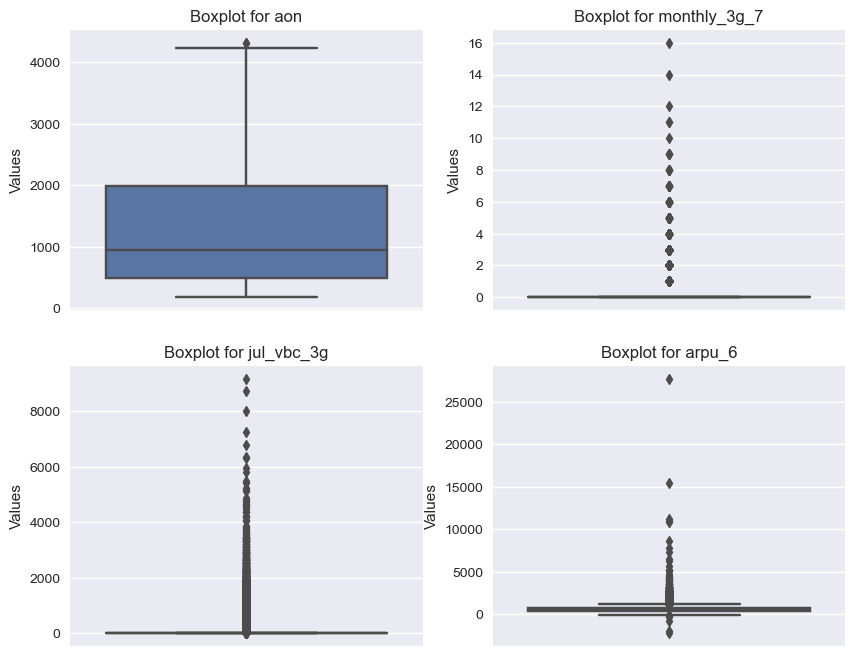

In [48]:
# Plotting a few Boxplots to check outliers

data = ['aon', 'monthly_3g_7', 'jul_vbc_3g', 'arpu_6']
plt.figure(figsize=(10,8))

x = 1
for a in data:
    plt.subplot(2,2,x)
    sns.boxplot(y=a, data=Cleaning_df)
    plt.title(f'Boxplot for {a}')
    plt.ylabel('Values')
    x+=1
plt.show()

> Need to fix outliers

In [49]:
quantiles_df = Cleaning_df.quantile([0.05, 0.95])

# Checking for each numerical column
for cols in Cleaning_df.select_dtypes(include=['int', 'float']).columns:
    quantile_df = quantiles_df[cols]

    # Apply clipping to fix outliers
    Cleaning_df[cols] = Cleaning_df[cols].clip(quantile_df.iloc[0], quantile_df.iloc[1])

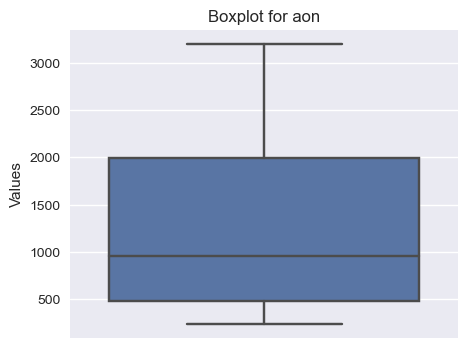

In [50]:
### Just checking above Outliner detection Function
data = ['aon']
plt.figure(figsize=(5,4))
for a in data:
    sns.boxplot(y=a, data=Cleaning_df)
    plt.title(f'Boxplot for {a}')
    plt.ylabel('Values')
plt.show()

## Step-4) Data Visulisation

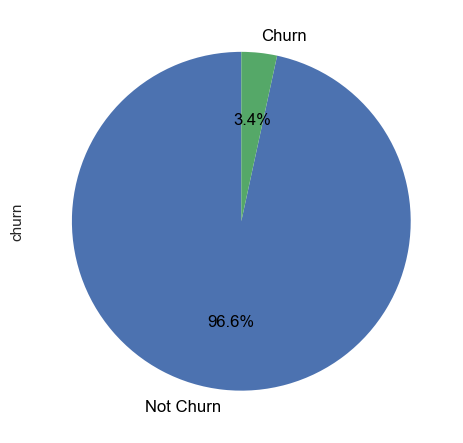

In [51]:
# Target
target = round(Cleaning_df.churn.value_counts(normalize=True)*100,2)
x = ['Not Churn','Churn']
target.plot.pie(labels=x,autopct='%1.1f%%',
                textprops={'fontsize': 12, 'fontweight' : 8, 'color' : 'Black'}, startangle=90)
plt.show()

> Visualising the recharge ammount with Churn

['total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'avg_rech_amt_6_7']


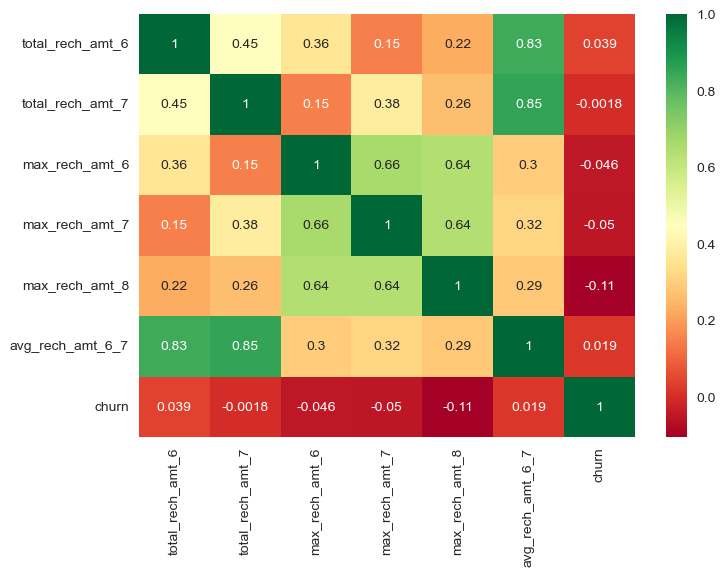

In [52]:
filtered_columns = [col for col in Cleaning_df.columns if 'rech_amt' in col]

print(filtered_columns)

Cleaning_df['churn'] = Cleaning_df['churn'].astype(int)
num_category = ['total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                'avg_rech_amt_6_7','churn']

sns.heatmap(Cleaning_df[num_category].corr(), cmap="RdYlGn", annot=True)
plt.show()

> Visualising the Volume of 2G with Churn

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']


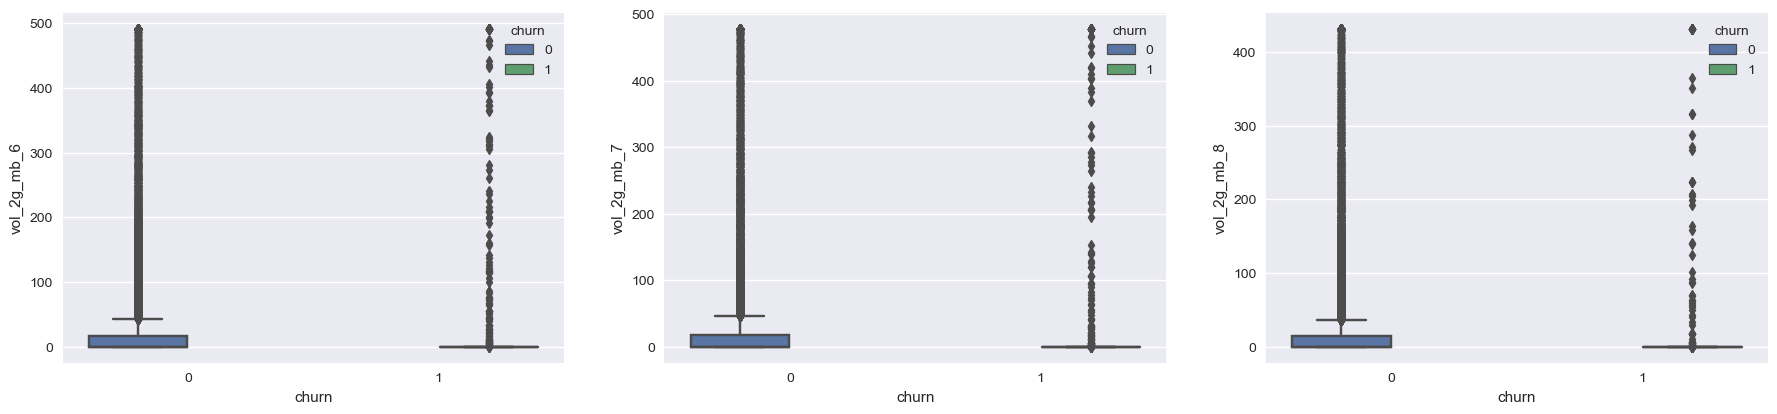

In [53]:
filtered_columns = [col for col in Cleaning_df.columns if 'vol_2g' in col]

print(filtered_columns)

plt.figure(figsize=(22,10))
for index in range(0,len(filtered_columns)):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=Cleaning_df, y=filtered_columns[index],x="churn",hue="churn")

> Visualising the Volume of 3G with Churn

['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']


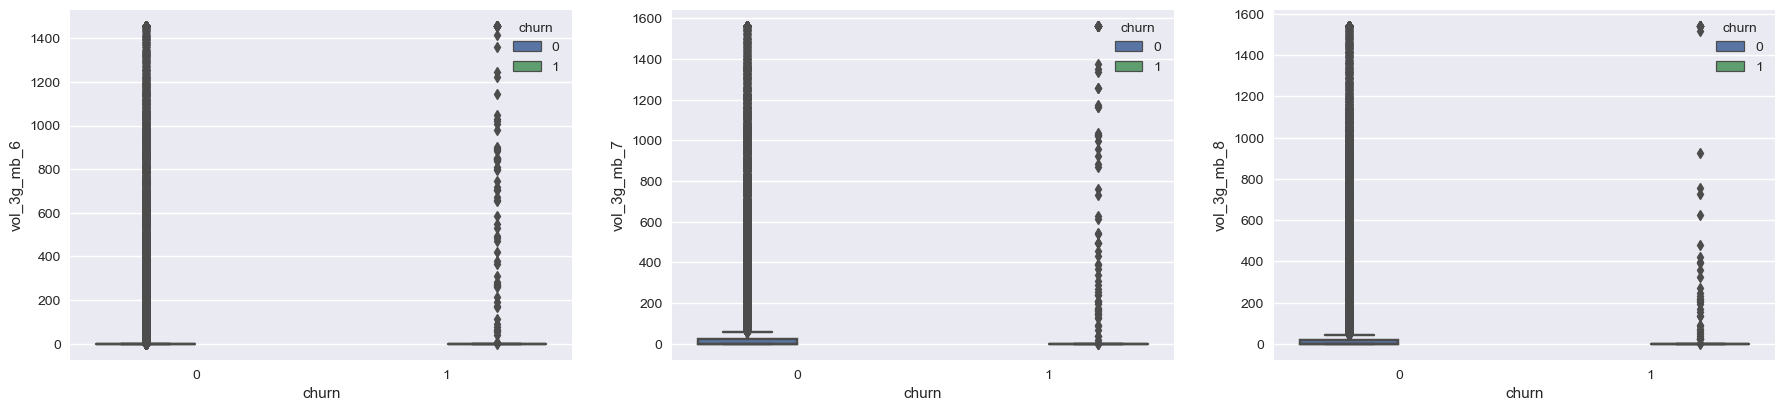

In [54]:
filtered_columns = [col for col in Cleaning_df.columns if 'vol_3g' in col]

print(filtered_columns)

plt.figure(figsize=(22,10))
for index in range(0,len(filtered_columns)):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=Cleaning_df, y=filtered_columns[index],x="churn",hue="churn")

> Average revenue per user with churn

['arpu_6', 'arpu_7', 'arpu_8']


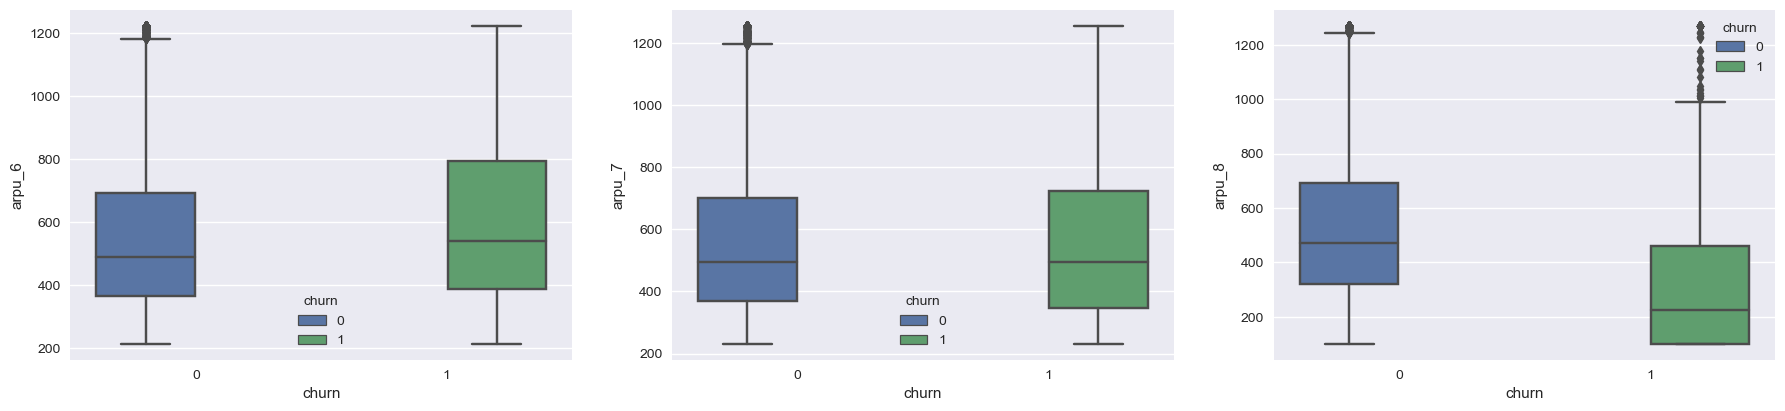

In [55]:
filtered_columns = [col for col in Cleaning_df.columns if 'arpu' in col]

print(filtered_columns)

plt.figure(figsize=(22,10))
for index in range(0,len(filtered_columns)):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=Cleaning_df, y=filtered_columns[index],x="churn",hue="churn")

> Special calls with churn

['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']


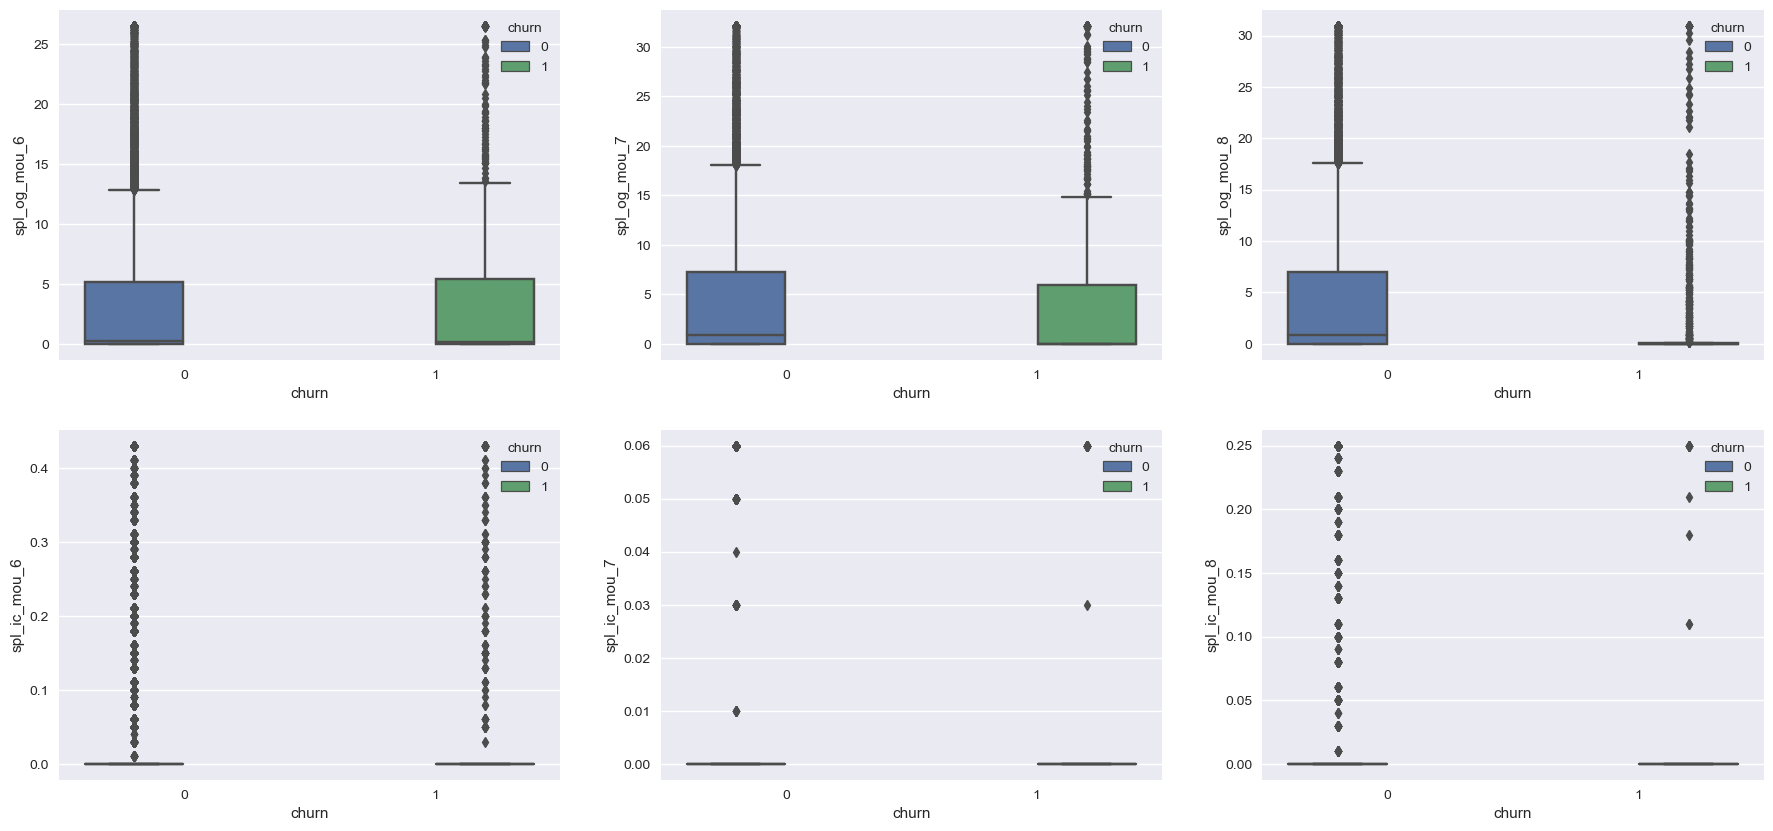

In [56]:
filtered_columns = [col for col in Cleaning_df.columns if 'spl' in col]

print(filtered_columns)

plt.figure(figsize=(22,10))
for index in range(0,len(filtered_columns)):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=Cleaning_df, y=filtered_columns[index],x="churn",hue="churn")

> Local calls with churn

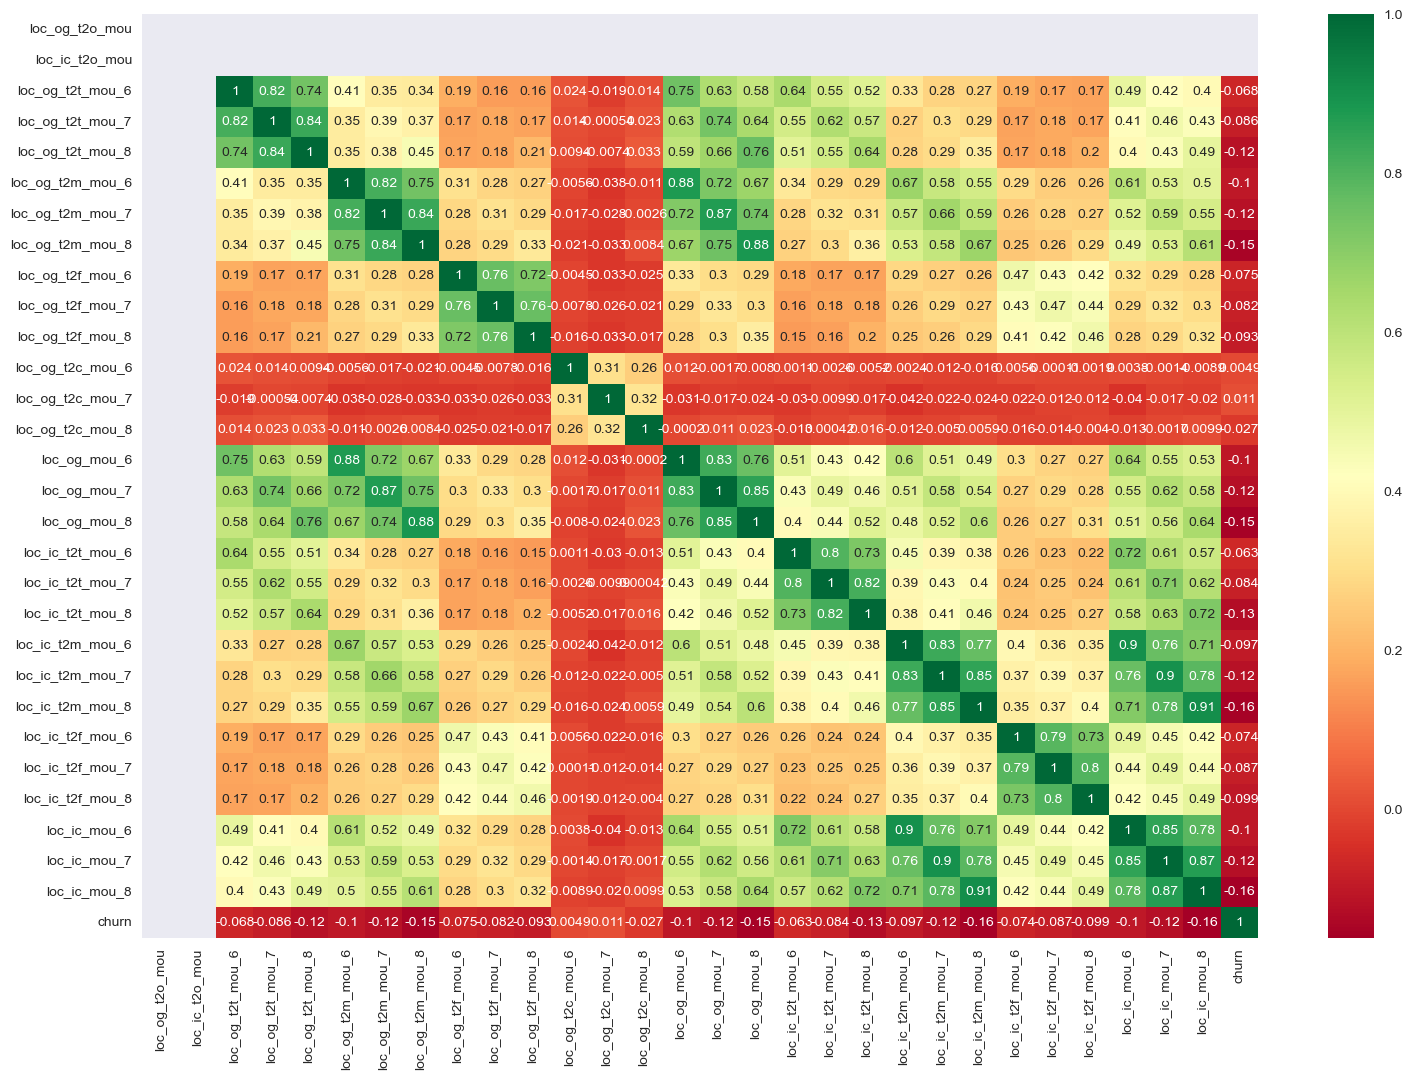

In [57]:
filtered_columns = [col for col in Cleaning_df.columns if 'loc' in col]

#print(filtered_columns)

filtered_columns.append('churn')

plt.figure(figsize=(18,12))
sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

# loc_og_t2o_mou and loc_ic_t2o_mou can be droped because of no coorelation

In [58]:
Cleaning_df.drop(['loc_og_t2o_mou','loc_ic_t2o_mou'] ,axis=1,inplace=True)

> ISD calls with churn

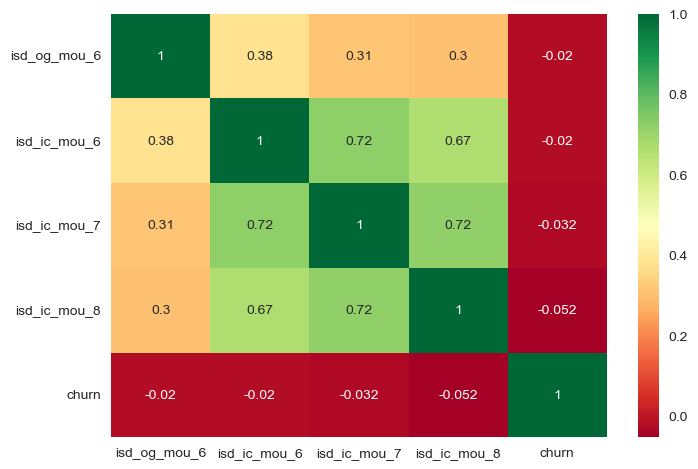

In [59]:
filtered_columns = [col for col in Cleaning_df.columns if 'isd' in col]

#print(filtered_columns)

filtered_columns.append('churn')

sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

> STD calls with churn

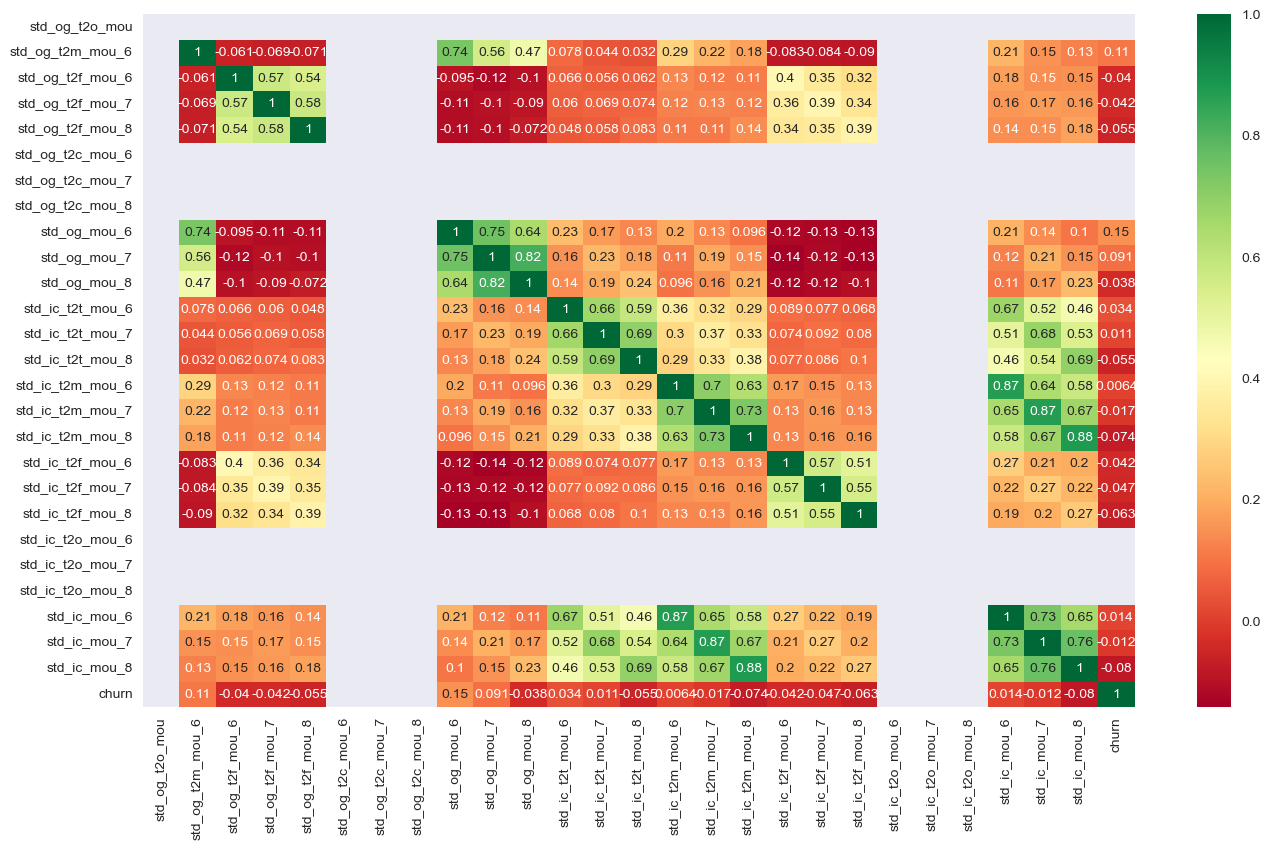

In [60]:
filtered_columns = [col for col in Cleaning_df.columns if 'std' in col]

#print(filtered_columns)

filtered_columns.append('churn')

plt.figure(figsize=(16,9))
sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

# std_og_t2o_mou_6,7,8 , std_og_t2c_mou_7, std_og_t2c_mou_8 can be droped because of no coorelation

In [61]:
drop_col = ['std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
Cleaning_df.drop(drop_col ,axis=1,inplace=True)

> ***Pairplot between total_rech_amt, max_rech_amt and last_day_rch_amt of the first two months (good phase).***

<Figure size 2000x2000 with 0 Axes>

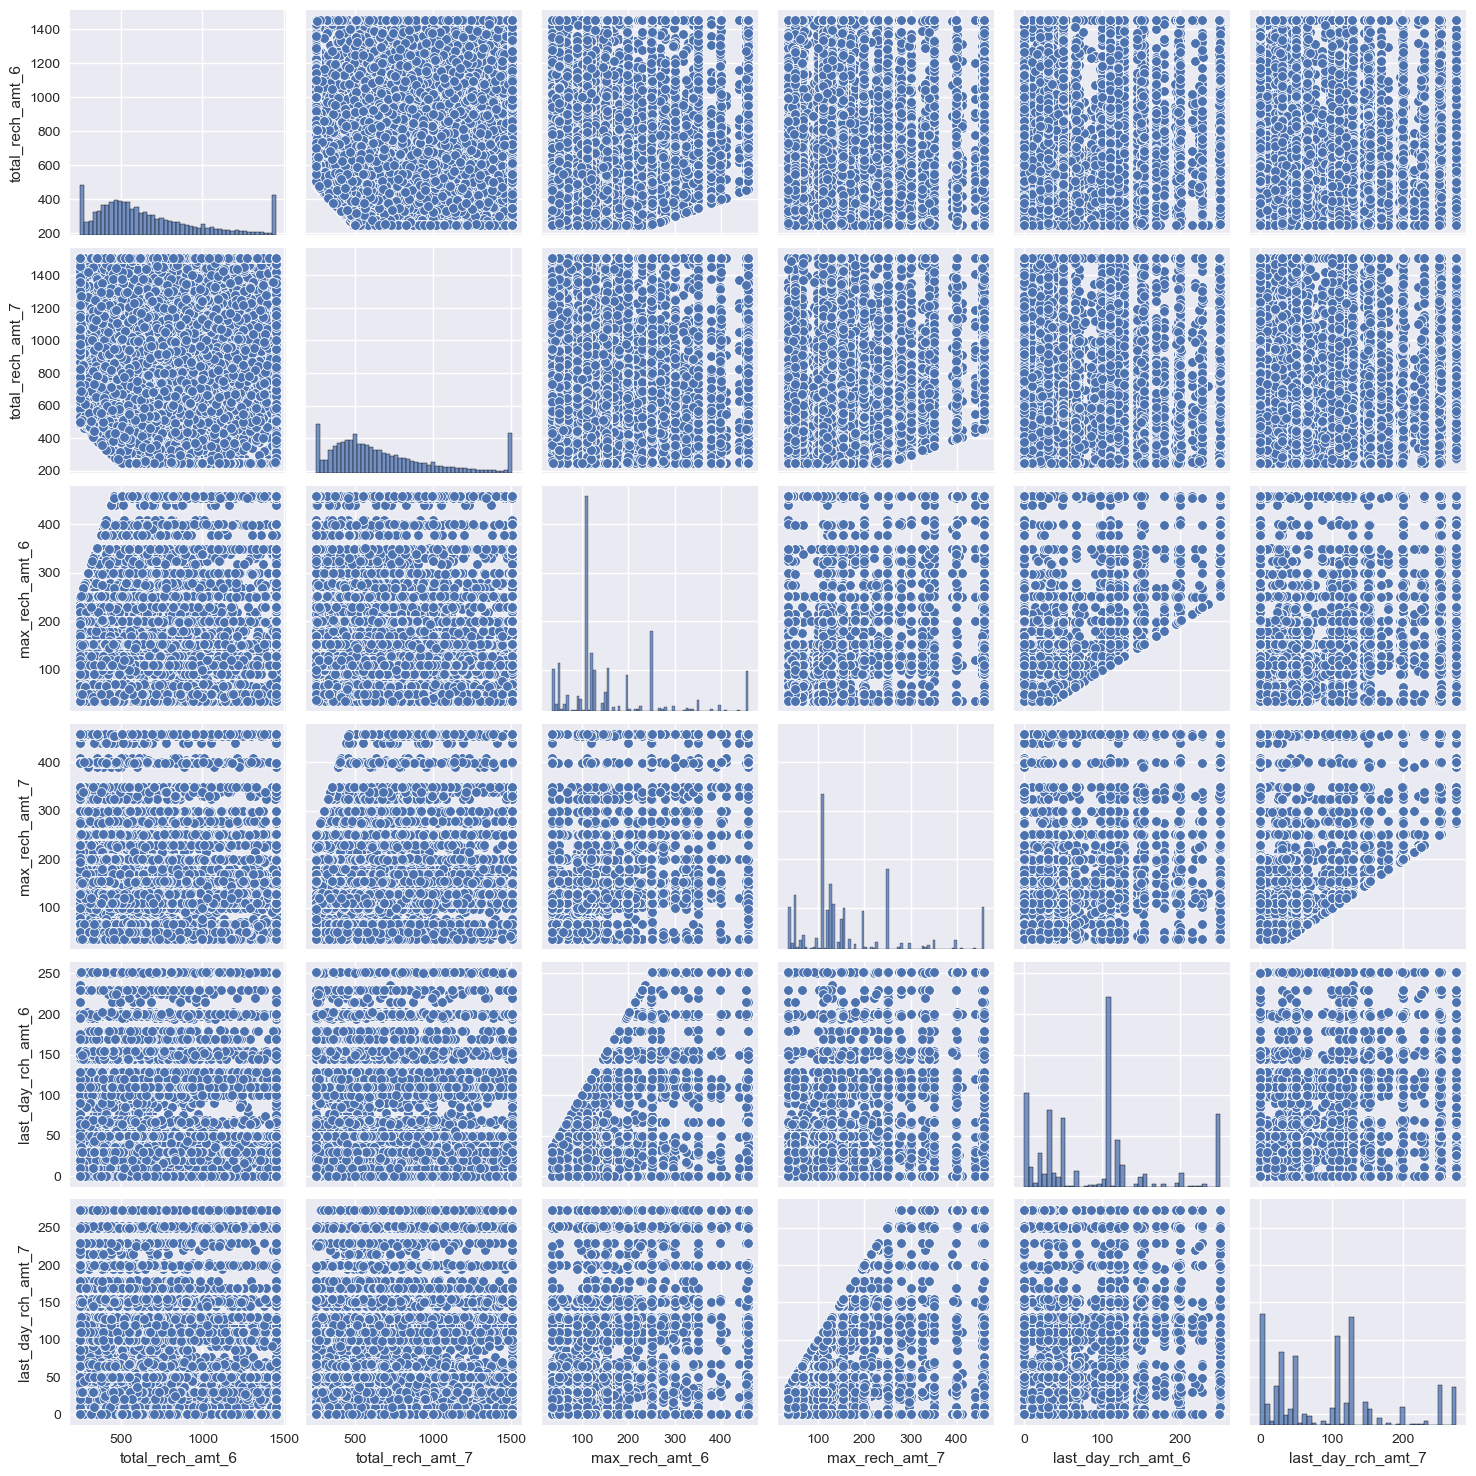

In [62]:
cols = ['total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7']


plt.figure(figsize=(20, 20))

sns.pairplot(Cleaning_df[cols])

plt.show()

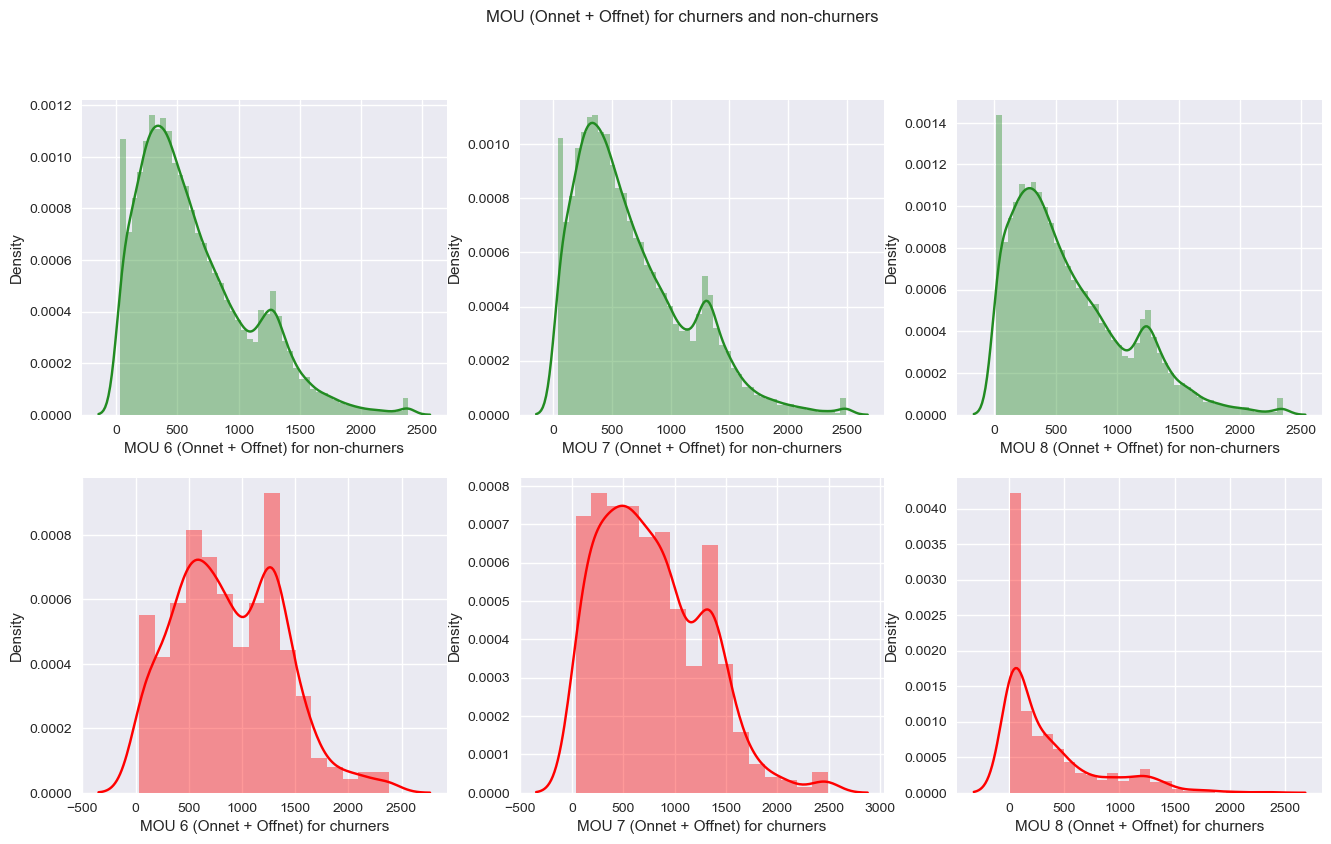

In [63]:
df = Cleaning_df[['churn', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']]

df['mou_6'] = Cleaning_df['onnet_mou_6'] + Cleaning_df['offnet_mou_6']
df['mou_7'] = Cleaning_df['onnet_mou_7'] + Cleaning_df['offnet_mou_7']
df['mou_8'] = Cleaning_df['onnet_mou_8'] + Cleaning_df['offnet_mou_8']

plt.figure(figsize=(16,9))

plt.subplot(2,3,1)
sns.distplot(df[df['churn']==0]['mou_6'], color="forestgreen")
plt.xlabel("MOU 6 (Onnet + Offnet) for non-churners")

plt.subplot(2,3,2)
sns.distplot(df[df['churn']==0]['mou_7'], color="forestgreen")
plt.xlabel("MOU 7 (Onnet + Offnet) for non-churners")

plt.subplot(2,3,3)
sns.distplot(df[df['churn']==0]['mou_8'], color="forestgreen")
plt.xlabel("MOU 8 (Onnet + Offnet) for non-churners")

plt.subplot(2,3,4)
sns.distplot(df[df['churn']==1]['mou_6'], color="red")
plt.xlabel("MOU 6 (Onnet + Offnet) for churners")

plt.subplot(2,3,5)
sns.distplot(df[df['churn']==1]['mou_7'], color="red")
plt.xlabel("MOU 7 (Onnet + Offnet) for churners")

plt.subplot(2,3,6)
sns.distplot(df[df['churn']==1]['mou_8'], color="red")
plt.xlabel("MOU 8 (Onnet + Offnet) for churners")

plt.suptitle('MOU (Onnet + Offnet) for churners and non-churners')

plt.show();

*So, there is a clear drop in MOU for Churners.*

In [64]:
## Copying data into New Feature variable 
New_Features = Cleaning_df.copy()

In [65]:
## The good phase of customer revenue of customers is given by arpu_6 and arpu_7
New_Features["avg_arpu_6_7"] = (New_Features['arpu_6']+New_Features['arpu_7'])/2
print(New_Features['avg_arpu_6_7'].head())

New_Features.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

8     435.472
13    362.113
16    365.422
17    460.694
21    556.103
Name: avg_arpu_6_7, dtype: float64


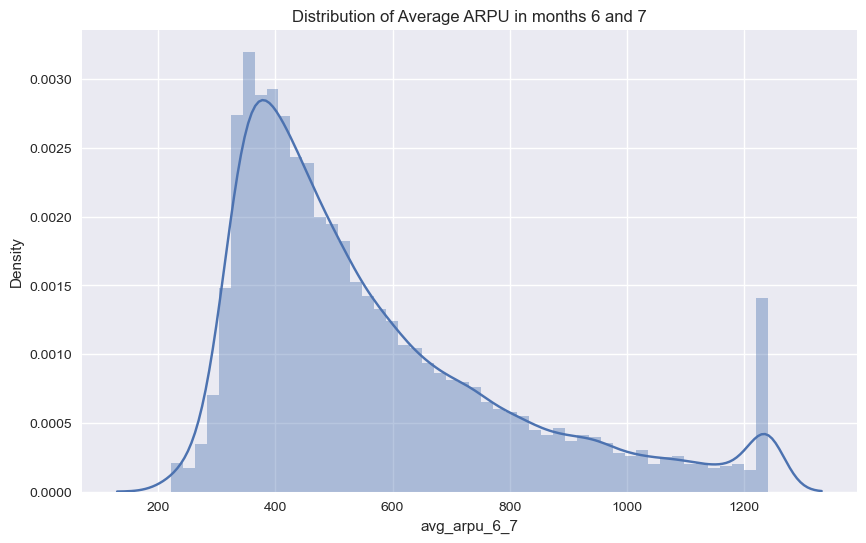

In [66]:
## visualizing the distribution of observations
plt.figure(figsize=(10, 6))
plt.title('Distribution of Average ARPU in months 6 and 7')
sns.distplot(New_Features["avg_arpu_6_7"])
plt.show()

In [67]:
# Convert Age on Network (AON) from days to months
New_Features['aon_mon'] = (New_Features['aon']/30).round(0)
New_Features.drop('aon', axis=1, inplace=True)

## Printing few Columns
New_Features['aon_mon'].head(4)

8     10.0
13    87.0
16    17.0
17    22.0
Name: aon_mon, dtype: float64

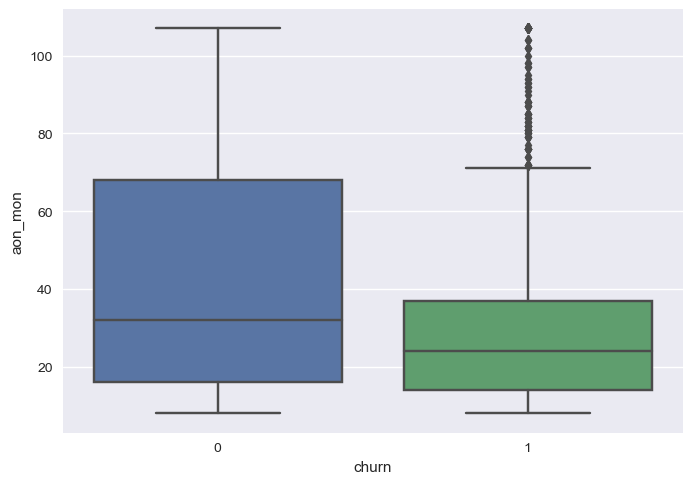

In [68]:
## visualizing the distribution of observations through Boxplot
sns.boxplot(x = New_Features.churn, y = New_Features.aon_mon)
plt.show()

Text(0.5, 1.0, 'Tenure Distribution')

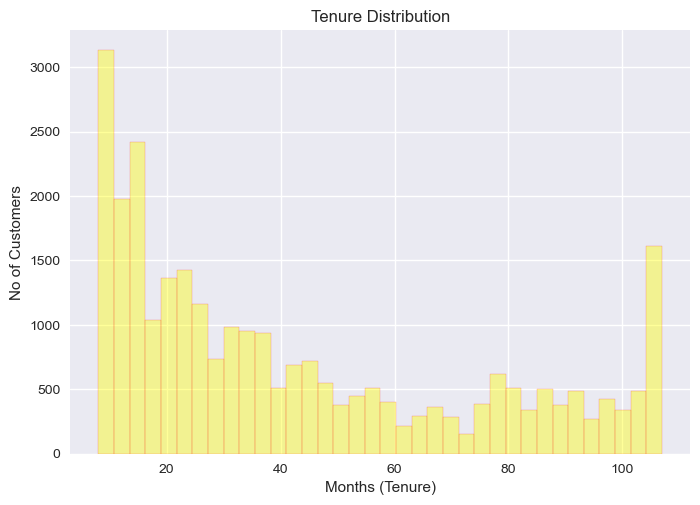

In [69]:
# Plot a histogram of Age on Network (AON) in months
ax = sns.distplot(New_Features['aon_mon'], hist=True, kde=False,
                  bins=int(180/5), color='yellow',
                  hist_kws={'edgecolor': 'red'},
                  kde_kws={'linewidth': 9})

# Set labels for y-axis and x-axis
ax.set_ylabel('No of Customers')
ax.set_xlabel('Months (Tenure)')

# Set the title of the graph
ax.set_title('Tenure Distribution')

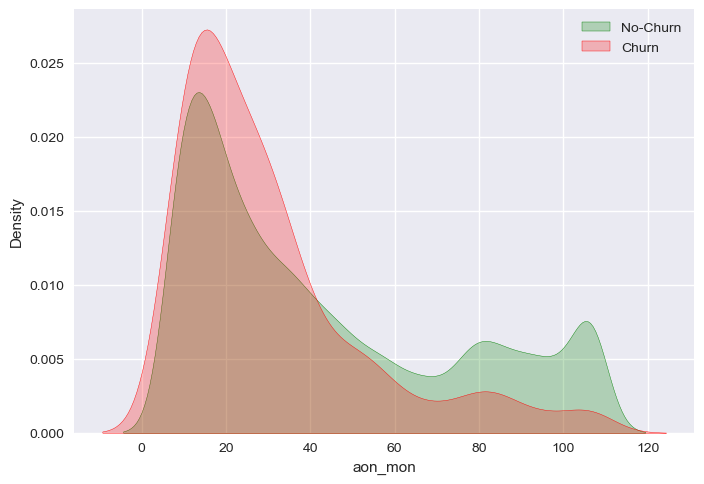

In [70]:
## visualizing the distribution of observations
ax = sns.kdeplot(New_Features.aon_mon[(New_Features["churn"] == 0)],
                color="green", shade = True)
ax = sns.kdeplot(New_Features.aon_mon[(New_Features["churn"] == 1)],
                ax =ax, color="red", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
plt.show()

In [71]:
# Convert Age on Network (AON) into Tenure range
tenure_range = [6,12, 24, 60, 61]
tenure_label = ['0-12 Months', '1-2 Yrs', '2-5 Yrs','5 Yrs and above']
New_Features['tenure_range'] = pd.cut(New_Features['aon_mon'],tenure_range, labels=tenure_label)
print(New_Features['tenure_range'].head())

8     0-12 Months
13            NaN
16        1-2 Yrs
17        1-2 Yrs
21        1-2 Yrs
Name: tenure_range, dtype: category
Categories (4, object): ['0-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']


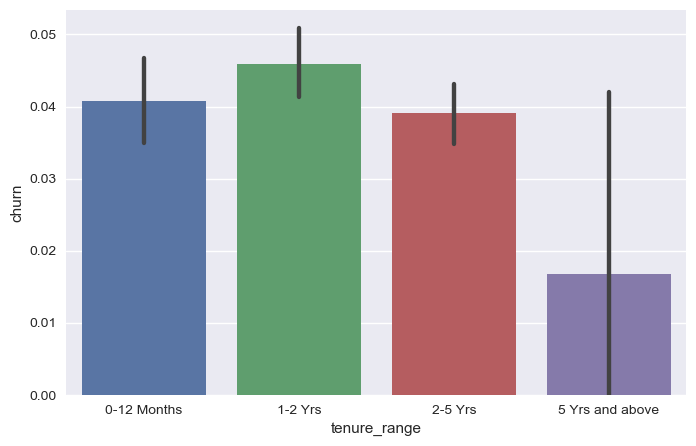

In [72]:
## visualizing the distribution of observations
plt.figure(figsize=[8,5])
sns.barplot(x='tenure_range', y='churn',data=New_Features)
plt.show()

> Maximum Churn happen between 1-2 years and gradually decline after each year passes.

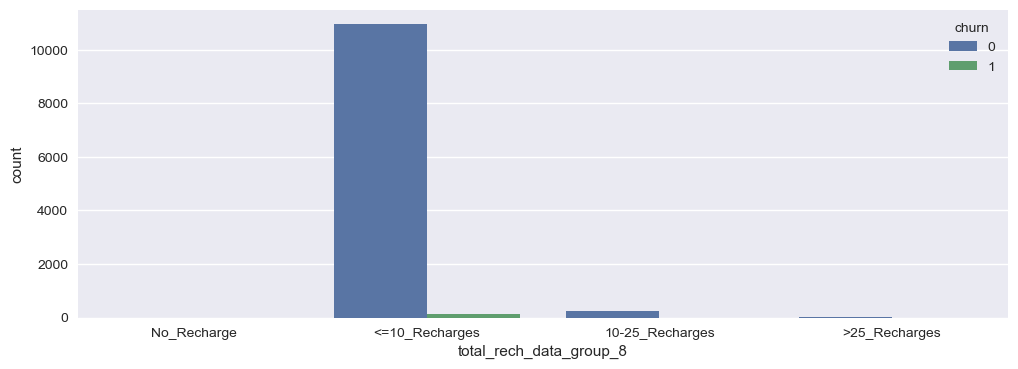

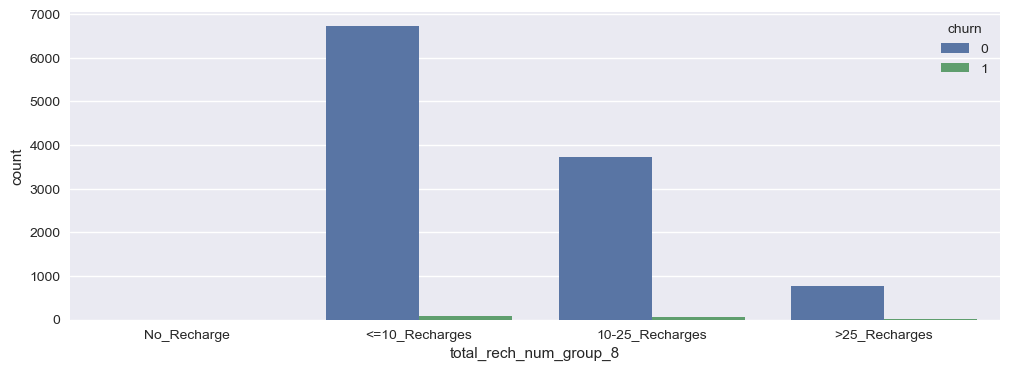

In [73]:
### Deirved new features to check Total Recharges
range_ = [-1,0,10, 25,100]
label = ["No_Recharge", "<=10_Recharges","10-25_Recharges",">25_Recharges"]
New_Features['total_rech_data_group_8']= pd.cut(Reading_df['total_rech_data_8'], range_, labels=label)

New_Features.dropna(subset=['total_rech_data_group_8'], inplace=True)
plt.figure(figsize=[12,4])
sns.countplot(data=New_Features, x="total_rech_data_group_8",hue="churn")

range_ =[-1,0,10,25,100]
label = ["No_Recharge","<=10_Recharges", "10-25_Recharges",">25_Recharges"]
New_Features['total_rech_num_group_8'] = pd.cut(Reading_df['total_rech_num_8'], range_, labels=label)

New_Features.dropna(subset=['total_rech_num_group_8'], inplace=True)
plt.figure(figsize=[12,4])
sns.countplot(data=New_Features, x="total_rech_num_group_8",hue="churn")
plt.show()

> churn rate decreases as the number of recharge rate increases

## Step 5) Data Preprocessing

### Standard Scaler

In [74]:
Data_Preprocessing = Cleaning_df.copy()

In [75]:
from sklearn.preprocessing import StandardScaler ## Importing Libaries

### Function to automatically detect and scale numerical columns
Data_Preprocessing['churn'] = Data_Preprocessing['churn'].astype(object)
def Feature_Scaling(Data_Preprocessing):
    # Detecting numerical columns
    cols = Data_Preprocessing.select_dtypes(include=['int', 'float']).columns

    # Initializing StandardScaler
    scaler = StandardScaler()

    # Scaling numerical columns
    Data_Preprocessing[cols] = scaler.fit_transform(Data_Preprocessing[cols])

    return Data_Preprocessing

# Applying scaling to numerical columns
Data_Preprocessing = Feature_Scaling(Data_Preprocessing)
Data_Preprocessing.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
8     7001524846 -0.678781 -0.286383 -1.291905     0.478414     0.226979   
13    7002191713 -0.253232 -1.243423  0.206710     0.757256    -0.496776   
16    7000875565 -0.483936 -0.992135 -1.125798    -0.671463    -0.599326   
17    7000187447  0.481944 -1.243423 -1.412283     2.772421    -0.792405   
21    7002124215 -0.172664  0.100809  0.352989    -0.507140    -0.426023   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8     -0.669746     -0.884699     -0.930151     -0.681219      -0.378791   
13     0.923197      0.084924     -0.816350      0.381064       0.596972   
16    -0.556361     -0.271157     -0.491113     -0.600530      -0.378791   
17    -0.756835     -0.985176     -1.072291     -1.061177      -0.378791   
21    -0.509992      1.133571      1.472619      1.919101      -0.378791   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8       -0.352800      -0.360184      -0.389486      -0.363060      -0.363815   
13       3.658256       3.646776      -0.202610       0.808584      -0.316174   
16      -0.174796      -0.360184      -0.389486       0.226417      -0.363815   
17      -0.053402      -0.070139      -0.389486      -0.081945       0.077526   
21      -0.352800      -0.360184      -0.389486      -0.363060      -0.363815   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8           2.380299          1.520234         -0.627946         -0.500274   
13         -0.246503         -0.717262         -0.367841         -0.094099   
16         -0.321009         -0.093113         -0.020924          0.613018   
17         -0.359429         -0.782778         -0.766071         -0.630051   
21         -0.725696         -0.717580         -0.507957         -0.437470   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8          -0.582751         -0.649579         -0.551982         -0.558124   
13         -0.718709          0.795670         -0.066694         -0.558124   
16         -0.142727         -0.188962         -0.551982         -0.086982   
17         -0.977846         -0.949034         -0.551982         -0.558124   
21         -0.481512         -0.328024         -0.471814         -0.558124   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8          -0.554571         -0.412448         -0.423864          2.373181   
13          2.120147         -0.412448         -0.423864         -0.231477   
16          0.612703         -0.412448         -0.423864         -0.423111   
17         -0.554571         -0.412448         -0.423864         -0.423111   
21         -0.374816         -0.412448         -0.423864         -0.423111   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2m_mou_6  \
8       0.445571      0.084713     -0.732838         -0.588696   
13     -0.216139     -0.823688      0.412068          0.344135   
16      0.207435     -0.196052     -0.170557         -0.552799   
17     -0.628874     -1.006104     -0.980117         -0.635556   
21     -0.630789     -0.666508     -0.470369          1.926710   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
8          -0.346896         -0.347549         -0.340727     -0.485375   
13         -0.346896         -0.347549         -0.340727      0.774922   
16         -0.346896         -0.347549         -0.340727     -0.704502   
17         -0.346896         -0.347549         -0.340727      1.759926   
21         -0.346896         -0.347549         -0.340727      0.910562   

    std_og_mou_7  std_og_mou_8  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  \
8      -0.483985     -0.505797     -0.273492     -0.580838     -0.619454   
13     -0.493420      0.723305     -0.273492     -0.580838     -0.619454   
16     -0.642389     -0.675187     -0.273492     -0.580838     -0.254841   
17     -0.779829     -0.722705     -0.273492     

### Spilting into Train-Test Spilt

In [76]:
X = Data_Preprocessing.drop(['mobile_number','churn'], axis=1)
y = Data_Preprocessing['churn']

y = y.astype(int)

print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (27991, 113)
Y shape: (27991,)


In [77]:
## Spliting into 70:30 Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (19593, 113)
Y_train shape: (19593,)
X_test shape: (8398, 113)
Y_test shape: (8398,)


### Class Imbalance

In [78]:
### !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

### PCA

In [79]:
PCA = PCA(random_state=30)

In [80]:
# Fitting Data
PCA.fit(x_train)
PCA.components_

array([[ 5.81950902e-02,  9.94381568e-02,  1.61951129e-01, ...,
         7.09154058e-02,  6.67579488e-02,  9.00453886e-02],
       [ 1.79886105e-01,  1.75102359e-01,  7.73446079e-02, ...,
        -6.51650215e-02, -6.58716740e-02,  1.98559521e-01],
       [ 1.56677844e-01,  1.27674165e-01,  1.18271585e-01, ...,
         2.83341242e-02,  3.94000861e-02,  1.72151978e-01],
       ...,
       [-5.69614873e-03,  1.22873882e-02, -1.15396301e-02, ...,
         8.83186471e-04,  1.28136916e-04, -1.21226975e-02],
       [-0.00000000e+00,  3.64075672e-18, -1.56408323e-16, ...,
        -1.37829038e-16,  4.13441340e-17, -2.04051798e-16],
       [ 0.00000000e+00, -5.39247660e-17, -1.96849278e-16, ...,
         2.50810018e-16, -9.47755973e-17,  2.38833952e-16]])

In [81]:
# Cumulative variance of the principal components
cumulative_variance = np.cumsum(PCA.explained_variance_ratio_)

# Print the cumulative variance
print("Cumulative Variance of Principal Components:")
print(cumulative_variance)

Cumulative Variance of Principal Components:
[0.1440377  0.24822255 0.33048189 0.38148977 0.42583947 0.46791619
 0.50486379 0.53984238 0.56178618 0.58305098 0.60257264 0.62121374
 0.63913726 0.65455318 0.66989858 0.6844909  0.69739805 0.709495
 0.72060882 0.73136745 0.74162037 0.75144014 0.760944   0.77013827
 0.77823319 0.78612459 0.79373919 0.80116785 0.80840239 0.81529888
 0.82174503 0.82794391 0.83383351 0.83947288 0.84503712 0.85054157
 0.85592575 0.86120038 0.86637506 0.87132892 0.87606637 0.88074866
 0.88540262 0.88979187 0.89411327 0.89837177 0.90256293 0.90647662
 0.91030393 0.91390448 0.91742051 0.92078409 0.92401121 0.92712138
 0.93012951 0.9331033  0.93590845 0.9386445  0.94125303 0.94383391
 0.94635079 0.94883858 0.95128006 0.95365406 0.95596983 0.95825372
 0.96040335 0.96253726 0.96462816 0.96666383 0.96856873 0.97040644
 0.9721711  0.97389521 0.97557824 0.97719764 0.97878396 0.98034545
 0.98177584 0.98315879 0.98448862 0.98572553 0.98692931 0.98812096
 0.98919813 0.99022

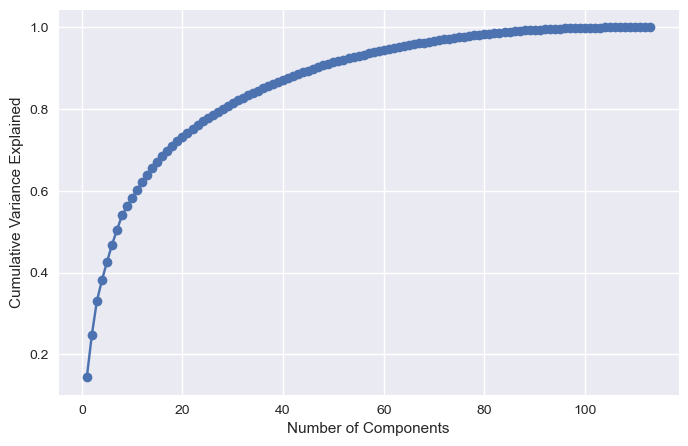

In [82]:
## Plotting Cumulative Variance of Principal Components
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

> Taking 60 number of components as it is covering more than 90 percent of data

In [83]:
## Building
IncrementalPCA = IncrementalPCA(n_components=60)

In [84]:
## Transforming
PCA_x_train = IncrementalPCA.fit_transform(x_train)
PCA_x_test = IncrementalPCA.transform(x_test)

In [85]:
## Just for check
PCA_x_test

array([[ 7.70068848,  2.42942911,  2.03011096, ..., -0.9380904 ,
        -0.58580639, -0.65686766],
       [-2.9599026 ,  0.53275289,  4.02437231, ...,  0.01158792,
        -0.0547692 , -0.26828649],
       [-0.10151263,  5.03470983, -1.10622994, ...,  0.04483746,
        -0.06146363,  0.57009853],
       ...,
       [-0.65140034, -0.26335255, -0.81705763, ..., -0.24493574,
         0.50004631, -0.09485659],
       [-0.8582542 , -2.12419942, -3.6957328 , ...,  0.25021962,
        -0.17198609, -0.25012827],
       [ 0.80981019,  0.44469147, -2.30176402, ..., -0.47949237,
        -0.54814671,  0.46215672]])

> Data preprocessing completed. First model will be built without PCA, followed by exploration of different models using PCA.

## Step-6) Model Building

### 1) Model Building without PCA

### Feature Selection Using RFE

In [86]:
### Model building for Rfe

model = LogisticRegression()

rfe = RFE(model,n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [87]:
# Features distrution by rfe
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 53),
 ('arpu_7', True, 1),
 ('arpu_8', False, 64),
 ('onnet_mou_6', False, 15),
 ('onnet_mou_7', False, 72),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_6', False, 17),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 77),
 ('roam_ic_mou_7', False, 90),
 ('roam_ic_mou_8', False, 20),
 ('roam_og_mou_6', False, 19),
 ('roam_og_mou_7', False, 73),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 89),
 ('loc_og_t2t_mou_7', False, 8),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 9),
 ('loc_og_t2m_mou_7', False, 6),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 38),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 51),
 ('loc_og_t2c_mou_6', False, 87),
 ('loc_og_t2c_mou_7', False, 63),
 ('loc_og_t2c_mou_8', False, 36),
 ('loc_og_mou_6', False, 27),
 ('loc_og_mou_7', False, 7),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 84),
 ('std_og_t2f_mou_6', False, 40),
 ('std_og_t2f_mou_

In [88]:
## Features which support the target
rfe_support = x_train.columns[rfe.support_]
rfe_support

Index(['arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8'],
      dtype='object')

#### Model-1

In [89]:
import statsmodels.api as sm
X_train_const = sm.add_constant(x_train[rfe_support])
model_first = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_first = model_first.fit()
model_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37843
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11424.
Date:                Tue, 05 Mar 2024   Deviance:                       22849.
Time:                        23:05:20   Pearson chi2:                 1.22e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5429
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2080      0.048    -67.295      0.000      -3.301      -3.115
arpu_7                 0.4533      0.029     15.431      0.000       0.396       0.511
offnet_mou_8          -0.0462      0.027     -1.722      0.085      -0.099       0.006
roam_og_mou_8          0.8015      0.016     48.944      0.000       0.769       0.834
loc_og_t2t_mou_8      -0.6827      0.100     -6.855      0.000      -0.878      -0.487
loc_og_t2m_mou_8      -1.3861      0.129    -10.750      0.000      -1.639      -1.133
loc_og_t2f_mou_7      -0.4490      0.042    -10.583      0.000      -0.532      -0.366
loc_og_mou_8           1.5669      0.215      7.282      0.000       1.145       1.989
std_og_mou_7           1.5132      0.092     16.530      0.000       1.334       1.693
std_og_mou_8           0.3500      0.171      2.042      0.041       0.014       0.686
total_og_mou_7        -1.1022      0.091    -12.057      0.000      -1.281      -0.923
total_og_mou_8        -0.7670      0.179     -4.278      0.000      -1.118      -0.416
loc_ic_t2f_mou_8      -0.5041      0.051     -9.844      0.000      -0.604      -0.404
loc_ic_mou_8          -0.9168      0.062    -14.780      0.000      -1.038      -0.795
std_ic_t2f_mou_8      -0.4552      0.041    -11.208      0.000      -0.535      -0.376
spl_ic_mou_8          -0.4355      0.028    -15.456      0.000      -0.491      -0.380
total_rech_num_8      -0.7308      0.026    -28.308      0.000      -0.781      -0.680
last_day_rch_amt_7    -0.3962      0.025    -15.886      0.000      -0.445      -0.347
last_day_rch_amt_8    -0.7498      0.026    -28.872      0.000      -0.801      -0.699
monthly_2g_8          -0.5652      0.034    -16.650      0.000      -0.632      -0.499
monthly_3g_8          -0.6855      0.037    -18.553      0.000      -0.758      -0.613
======================================================================================
"""

#### Model-2

In [90]:
# Dropping
rfe_support_first = rfe_support.drop('offnet_mou_8')

## Building Second model
X_train_const = sm.add_constant(x_train[rfe_support_first])
model_second = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_second = model_second.fit()
model_second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37844
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11426.
Date:                Tue, 05 Mar 2024   Deviance:                       22852.
Time:                        23:05:20   Pearson chi2:                 1.28e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5429
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2082      0.048    -67.271      0.000      -3.302      -3.115
arpu_7                 0.4489      0.029     15.329      0.000       0.392       0.506
roam_og_mou_8          0.7973      0.016     49.303      0.000       0.766       0.829
loc_og_t2t_mou_8      -0.6750      0.099     -6.787      0.000      -0.870      -0.480
loc_og_t2m_mou_8      -1.4076      0.128    -10.962      0.000      -1.659      -1.156
loc_og_t2f_mou_7      -0.4493      0.042    -10.589      0.000      -0.532      -0.366
loc_og_mou_8           1.5394      0.215      7.171      0.000       1.119       1.960
std_og_mou_7           1.5119      0.092     16.522      0.000       1.333       1.691
std_og_mou_8           0.2999      0.169      1.779      0.075      -0.030       0.630
total_og_mou_7        -1.1001      0.091    -12.037      0.000      -1.279      -0.921
total_og_mou_8        -0.7371      0.178     -4.139      0.000      -1.086      -0.388
loc_ic_t2f_mou_8      -0.5045      0.051     -9.844      0.000      -0.605      -0.404
loc_ic_mou_8          -0.9161      0.062    -14.765      0.000      -1.038      -0.794
std_ic_t2f_mou_8      -0.4556      0.041    -11.224      0.000      -0.535      -0.376
spl_ic_mou_8          -0.4395      0.028    -15.654      0.000      -0.495      -0.384
total_rech_num_8      -0.7326      0.026    -28.386      0.000      -0.783      -0.682
last_day_rch_amt_7    -0.3985      0.025    -15.992      0.000      -0.447      -0.350
last_day_rch_amt_8    -0.7493      0.026    -28.844      0.000      -0.800      -0.698
monthly_2g_8          -0.5647      0.034    -16.629      0.000      -0.631      -0.498
monthly_3g_8          -0.6854      0.037    -18.537      0.000      -0.758      -0.613
======================================================================================
"""

#### Model-3

In [91]:
# Dropping
rfe_support_second = rfe_support_first.drop('std_og_mou_8')

## Building Second model
X_train_const = sm.add_constant(x_train[rfe_support_second])
model_third = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_third = model_third.fit()
model_third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37845
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11427.
Date:                Tue, 05 Mar 2024   Deviance:                       22855.
Time:                        23:05:21   Pearson chi2:                 1.31e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5428
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1913      0.047    -68.546      0.000      -3.283      -3.100
arpu_7                 0.4436      0.029     15.243      0.000       0.387       0.501
roam_og_mou_8          0.7974      0.016     49.344      0.000       0.766       0.829
loc_og_t2t_mou_8      -0.6379      0.097     -6.566      0.000      -0.828      -0.447
loc_og_t2m_mou_8      -1.3493      0.124    -10.870      0.000      -1.593      -1.106
loc_og_t2f_mou_7      -0.4470      0.042    -10.539      0.000      -0.530      -0.364
loc_og_mou_8           1.3266      0.180      7.382      0.000       0.974       1.679
std_og_mou_7           1.5628      0.087     17.997      0.000       1.393       1.733
total_og_mou_7        -1.1419      0.088    -12.952      0.000      -1.315      -0.969
total_og_mou_8        -0.4261      0.033    -12.849      0.000      -0.491      -0.361
loc_ic_t2f_mou_8      -0.5038      0.051     -9.834      0.000      -0.604      -0.403
loc_ic_mou_8          -0.9119      0.062    -14.733      0.000      -1.033      -0.791
std_ic_t2f_mou_8      -0.4549      0.041    -11.212      0.000      -0.534      -0.375
spl_ic_mou_8          -0.4390      0.028    -15.639      0.000      -0.494      -0.384
total_rech_num_8      -0.7323      0.026    -28.381      0.000      -0.783      -0.682
last_day_rch_amt_7    -0.3961      0.025    -15.925      0.000      -0.445      -0.347
last_day_rch_amt_8    -0.7475      0.026    -28.824      0.000      -0.798      -0.697
monthly_2g_8          -0.5640      0.034    -16.631      0.000      -0.631      -0.498
monthly_3g_8          -0.6849      0.037    -18.535      0.000      -0.757      -0.612
======================================================================================
"""

In [92]:
## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_second].columns,
                    'VIF': x_train[rfe_support_second].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_second].values,
                                                         x_train[rfe_support_second].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif.head()

Features    VIF
loc_og_mou_8          loc_og_mou_8  39.38
loc_og_t2m_mou_8  loc_og_t2m_mou_8  17.68
std_og_mou_7          std_og_mou_7  15.92
total_og_mou_7      total_og_mou_7  15.26
loc_og_t2t_mou_8  loc_og_t2t_mou_8   7.68

#### Model-4

In [93]:
# Dropping
rfe_support_third = rfe_support_second.drop('loc_og_mou_8')

## Building Second model
X_train_const = sm.add_constant(x_train[rfe_support_third])
model_forth = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_forth = model_forth.fit()

## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_third].columns,
                    'VIF': x_train[rfe_support_third].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_third].values,
                                                         x_train[rfe_support_third].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif.head()

Features    VIF
std_og_mou_7          std_og_mou_7  13.21
total_og_mou_7      total_og_mou_7  13.08
loc_og_t2m_mou_8  loc_og_t2m_mou_8   3.87
loc_ic_mou_8          loc_ic_mou_8   3.77
total_og_mou_8      total_og_mou_8   3.57

#### Model-5

In [94]:
# Dropping
rfe_support_forth = rfe_support_third.drop('std_og_mou_7')

## Building Second model
X_train_const = sm.add_constant(x_train[rfe_support_forth])
model_fith = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
model_fith = model_fith.fit()

## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_forth].columns,
                    'VIF': x_train[rfe_support_forth].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_forth].values,
                                                         x_train[rfe_support_forth].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif.head()

Features   VIF
loc_ic_mou_8          loc_ic_mou_8  3.77
total_og_mou_8      total_og_mou_8  3.45
loc_og_t2m_mou_8  loc_og_t2m_mou_8  2.98
total_og_mou_7      total_og_mou_7  2.79
arpu_7                      arpu_7  2.26

> P values are zero

> Vif Scores are good to go for Final Model

> We have 16 columns for final model without PCA

In [95]:
x_train[rfe_support_forth].columns

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

### Predications

In [96]:
Predicat = model_fith.predict(X_train_const)
Predicat[:7]

0    0.074188
1    0.000337
2    0.640547
3    0.099141
4    0.008432
5    0.187987
6    0.013501
dtype: float64

In [97]:
# Reshaping into an array
Predicat = Predicat.values.reshape(-1)
Predicat[:15]

array([7.41883798e-02, 3.37194920e-04, 6.40547298e-01, 9.91413914e-02,
       8.43183808e-03, 1.87987308e-01, 1.35012429e-02, 1.86535234e-02,
       1.71242546e-01, 8.68950343e-05, 2.47956844e-03, 1.23315514e-05,
       1.50626857e-01, 4.90055725e-01, 2.58311395e-02])

In [98]:
y_train_Predicat = pd.DataFrame({'Churn':y_train.values, 'Conversion_Prob':Predicat})
y_train_Predicat.head()

Churn  Conversion_Prob
0      0         0.074188
1      0         0.000337
2      0         0.640547
3      0         0.099141
4      0         0.008432

In [99]:
y_train_Predicat['Predicted'] = y_train_Predicat.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_Predicat.head()

Churn  Conversion_Prob  Predicted
0      0         0.074188          0
1      0         0.000337          0
2      0         0.640547          1
3      0         0.099141          0
4      0         0.008432          0

###  Evaluation of Predications

In [100]:
CM = metrics.confusion_matrix(y_train_Predicat.Churn, y_train_Predicat['Predicted'] )
CM

array([[16317,  2615],
       [ 1869, 17063]], dtype=int64)

In [101]:
## Metrics
precision = precision_score(y_train_Predicat.Churn, y_train_Predicat['Predicted'])
recall = recall_score(y_train_Predicat.Churn, y_train_Predicat['Predicted'])
TP = CM[1,1] # true positive
TN = CM[0,0] # true negatives
FP = CM[0,1] # false positives
FN = CM[1,0] # false negatives

print('Accuracy :',metrics.accuracy_score( y_train_Predicat['Predicted'],y_train_Predicat.Churn))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_train_Predicat['Predicted'],y_train_Predicat.Churn))

Accuracy : 0.8815761673357279
False Positive Rate : 0.13812592436087048
Positive Predictive Value : 0.8671104787071857
Negative predictive value : 0.8972286374133949
Sensitivity :  0.9012782590323262
Specificity :  0.8618740756391295
Precision: 0.87
Recall: 0.90
F1_Score: 0.8838642838642838


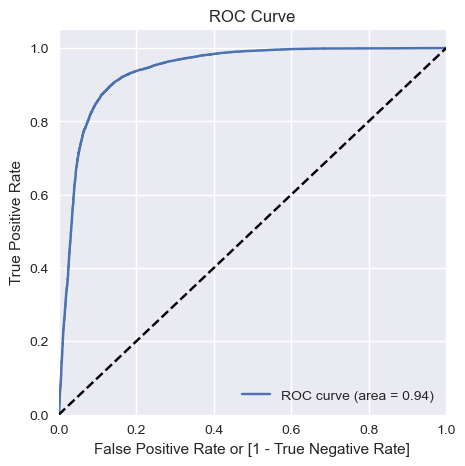

In [102]:
def roc_curve(y_train, y_probs, title='ROC'):

    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_train, y_probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

roc_curve(y_train_Predicat.Churn, y_train_Predicat.Conversion_Prob, title='ROC Curve')

### Precision and recall tradeoff

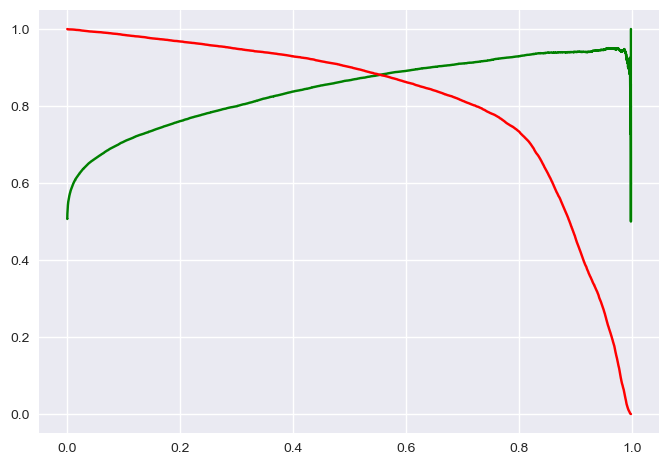

In [103]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_Predicat.Churn, y_train_Predicat.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [104]:
# Finding best cutoff through creating various probability cutoff
cutoffs = [float(x)/10 for x in range(10)]

# Create columns with different probability cutoffs
for cutoff in cutoffs:
    name = f'{cutoff:.1f}'  # Use formatted string for column names
    y_train_Predicat[name] = y_train_Predicat['Conversion_Prob'].apply(lambda x: 1 if x > cutoff else 0)

y_train_Predicat.head()

Churn  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0         0.074188          0    1    0    0    0    0    0    0    0   
1      0         0.000337          0    1    0    0    0    0    0    0    0   
2      0         0.640547          1    1    1    1    1    1    1    1    0   
3      0         0.099141          0    1    0    0    0    0    0    0    0   
4      0         0.008432          0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

   Probability Cutoff  Accuracy Sensitivity Specificity
0                 0.1   0.78877    0.984788    0.592753
1                 0.2  0.831687    0.967779    0.695595
2                 0.3  0.855588    0.948922    0.762254
3                 0.4  0.874472    0.928903     0.82004
4                 0.5  0.881576    0.901278    0.861874
5                 0.6  0.878565    0.862297    0.894834
6                 0.7  0.866866    0.813807    0.919924
7                 0.8  0.839108    0.733731    0.944486
8                 0.9  0.714082    0.457057    0.971107


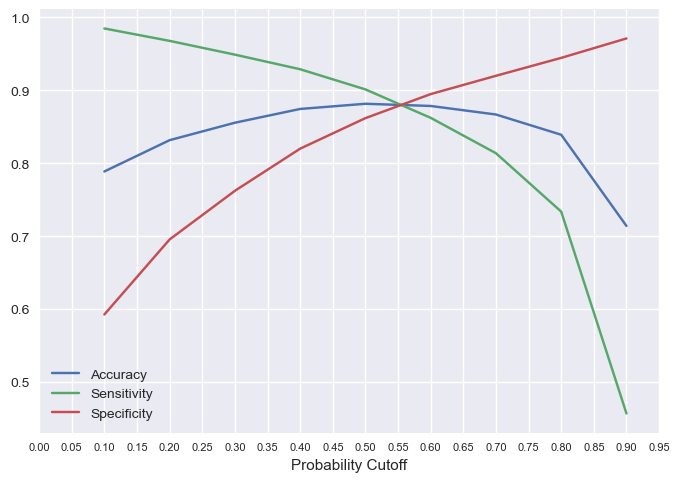

In [105]:
# Define the range of cutoff values
cutoffs = np.arange(0.1, 1.0, 0.1)

# Create an empty DataFrame to store evaluation metrics for each cutoff
evaluation_metrics = pd.DataFrame(index=cutoffs, columns=['Accuracy', 'Sensitivity', 'Specificity'])

# Calculate evaluation metrics for each cutoff
for cutoff in cutoffs:
    # Convert cutoff value to string format with one decimal place
    cutoff_str = f'{cutoff:.1f}'

    # Generate confusion matrix for the current cutoff
    confusion_matrix = metrics.confusion_matrix(y_train_Predicat['Churn'], y_train_Predicat[cutoff_str])

    # Calculate total number of predictions
    total_predictions = np.sum(confusion_matrix)

    # Calculate accuracy
    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total_predictions
    sensitivity = confusion_matrix[1, 1] / np.sum(confusion_matrix[1, :])
    specificity = confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])
    evaluation_metrics.loc[cutoff] = [accuracy, sensitivity, specificity]

# Set the name for the index and reset the index
evaluation_metrics.index.name = 'Probability Cutoff'
evaluation_metrics.reset_index(inplace=True)

# Display the evaluation metrics DataFrame
print(evaluation_metrics)

# Plot evaluation metrics against probability cutoff
evaluation_metrics.plot.line(x='Probability Cutoff', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.xticks(np.arange(0, 1, step=0.05), size=8)
plt.yticks(size=10)
plt.legend()
plt.show()

### From the curve 56 percent would be good Cutoff Points

In [106]:
y_train_Predicat['final_predicted'] = y_train_Predicat.Conversion_Prob.map( lambda x: 1 if x > 0.56 else 0)
y_train_Predicat.head(5)

Churn  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0         0.074188          0    1    0    0    0    0    0    0    0   
1      0         0.000337          0    1    0    0    0    0    0    0    0   
2      0         0.640547          1    1    1    1    1    1    1    1    0   
3      0         0.099141          0    1    0    0    0    0    0    0    0   
4      0         0.008432          0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                1  
3    0    0                0  
4    0    0                0

In [107]:
# Confusion matrix
Confusion_matrix_2 = metrics.confusion_matrix(y_train_Predicat.Churn, y_train_Predicat.final_predicted)
Confusion_matrix_2

array([[16723,  2209],
       [ 2289, 16643]], dtype=int64)

In [108]:
## Metrics beyond simply accuracy
TP = Confusion_matrix_2[1,1] # true positive
TN = Confusion_matrix_2[0,0] # true negatives
FP = Confusion_matrix_2[0,1] # false positives
FN = Confusion_matrix_2[1,0] # false negatives
precision = precision_score(y_train_Predicat.Churn, y_train_Predicat.final_predicted)
recall = recall_score(y_train_Predicat.Churn, y_train_Predicat.final_predicted)

print("Accuracy :",metrics.accuracy_score(y_train_Predicat.Churn, y_train_Predicat.final_predicted))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2}')
print(f'Recall: {recall:.2}')
print('F1_Score:', f1_score(y_train_Predicat.Churn, y_train_Predicat.final_predicted))

Accuracy : 0.8812064229875344
False Positive Rate : 0.11668075216564547
Positive Predictive Value : 0.8828241035433906
Negative predictive value : 0.8796023564064801
Sensitivity :  0.8790935981407141
Specificity :  0.8833192478343546
Precision: 0.88
Recall: 0.88
F1_Score: 0.8809549015456278


### Evaluation on Test Data

In [109]:
X_test = x_test[rfe_support_forth]

# Adding a const
Y = sm.add_constant(X_test)

# Making predictions on the test set
Y_test_predicat = model_fith.predict(Y)

In [110]:
# Reshaping into an array
Y_test_predicat = Y_test_predicat.values.reshape(-1)
Y_test_predicat[:15]

array([7.92374497e-03, 9.81770097e-01, 2.59912649e-01, 2.11107868e-02,
       8.28519213e-05, 4.23493417e-01, 1.50236135e-02, 1.55094711e-03,
       4.15544093e-04, 6.12089704e-02, 2.68623417e-01, 1.03623030e-01,
       1.34604596e-03, 7.75654112e-02, 1.52420021e-01])

In [111]:
Y_test_predicat = pd.DataFrame({'Churn':y_test.values, 'Conversion_Prob':Y_test_predicat})
Y_test_predicat.head()

Churn  Conversion_Prob
0      0         0.007924
1      1         0.981770
2      0         0.259913
3      0         0.021111
4      0         0.000083

In [112]:
Y_test_predicat['Predicted'] = Y_test_predicat.Conversion_Prob.map(lambda x: 1 if x > 0.56 else 0)
Y_test_predicat.head()

Churn  Conversion_Prob  Predicted
0      0         0.007924          0
1      1         0.981770          1
2      0         0.259913          0
3      0         0.021111          0
4      0         0.000083          0

In [113]:
Confusion_matrix = metrics.confusion_matrix(Y_test_predicat.Churn, Y_test_predicat['Predicted'] )
Confusion_matrix

array([[7167,  943],
       [  49,  239]], dtype=int64)

In [114]:
## Metrics beyond simply accuracy
precision = precision_score(Y_test_predicat['Predicted'],Y_test_predicat.Churn)
recall = recall_score(Y_test_predicat['Predicted'],Y_test_predicat.Churn)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

print('Accuracy :',metrics.accuracy_score( Y_test_predicat['Predicted'],Y_test_predicat.Churn))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(Y_test_predicat['Predicted'],Y_test_predicat.Churn))

Accuracy : 0.881876637294594
False Positive Rate : 0.11627620221948212
Positive Predictive Value : 0.20219966159052452
Negative predictive value : 0.9932095343680709
Sensitivity :  0.8298611111111112
Specificity :  0.8837237977805179
Precision: 0.83
Recall: 0.20
F1_Score: 0.3251700680272108


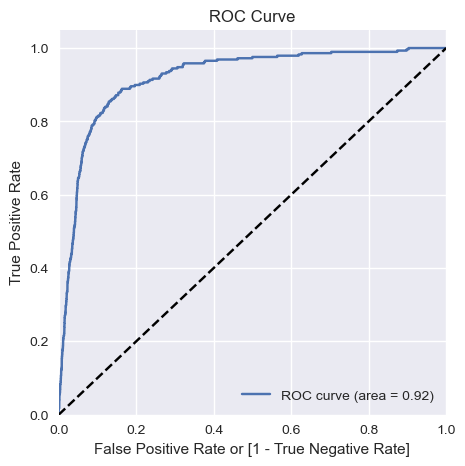

In [115]:
def roc_curve(y_train, y_probs, title='ROC'):

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

roc_curve(Y_test_predicat.Churn, Y_test_predicat.Conversion_Prob, title='ROC Curve')

### Model Summary

In [116]:
Confusion_matrix = metrics.confusion_matrix(y_train_Predicat.Churn, y_train_Predicat.final_predicted)
Confusion_matrix_1 = metrics.confusion_matrix(Y_test_predicat.Churn, Y_test_predicat['Predicted'])

train_data = {
    'Model': ['LogisticRegression_TRAIN_DATA With RFE'],
    'Accuracy': [metrics.accuracy_score(y_train_Predicat.Churn, y_train_Predicat.final_predicted)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['LogisticRegression_TEST_DATA With RFE'],
    'Accuracy': [metrics.accuracy_score(Y_test_predicat.Churn, Y_test_predicat['Predicted'])],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_A = pd.concat([train_df, test_df], axis=0)
results_A.set_index('Model', inplace=True)
results_A

Accuracy  Sensitivity  Specificity
Model                                                                     
LogisticRegression_TRAIN_DATA With RFE  0.881206     0.879094     0.883319
LogisticRegression_TEST_DATA With RFE   0.881877     0.829861     0.883724

## 2) Logistic regression with PCA

### Hypertunning

In [117]:
# Create a KFold object with 5 splits for cross-validation
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify parameters for grid search
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Define the scoring metric as recall to prioritize sensitivity over accuracy
grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid,
                           scoring='recall',
                           cv=cv_folds,
                           verbose=1,
                           return_train_score=True)

# Fit the grid search model
grid_search.fit(PCA_x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [118]:
# Results
tunning_results = pd.DataFrame(grid_search.cv_results_)
tunning_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.291239      0.051220         0.009615        0.003190    0.01   
1       0.332098      0.034843         0.006469        0.003235     0.1   
2       0.357516      0.024548         0.006468        0.003235       1   
3       0.355869      0.025624         0.008036        0.000040      10   
4       0.343762      0.024140         0.003205        0.003925     100   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.906012           0.895844           0.899553   
1   {'C': 0.1}           0.905224           0.895578           0.900079   
2     {'C': 1}           0.905224           0.895844           0.900079   
3    {'C': 10}           0.905224           0.895844           0.900079   
4   {'C': 100}           0.905224           0.895844           0.900079   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.910648           0.900053         0.902422        0.005247   
1           0.910385           0.902704         0.902794        0.004959   
2           0.910912           0.902704         0.902953        0.005047   
3           0.910912           0.902704         0.902953        0.005047   
4           0.910912           0.902704         0.902953        0.005047   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.902533            0.904796   
1                5            0.901673            0.904203   
2                1            0.901739            0.904269   
3                1            0.901739            0.904269   
4                1            0.901739            0.904269   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.903827            0.902167            0.904156   
1            0.903695            0.902233            0.902639   
2            0.903695            0.902035            0.902573   
3            0.903695            0.901969            0.902507   
4            0.903695            0.901969            0.902507   

   mean_train_score  std_train_score  
0          0.903496         0.000993  
1          0.902889         0.000933  
2          0.902862         0.000970  
3          0.902836         0.000986  
4          0.902836         0.000986

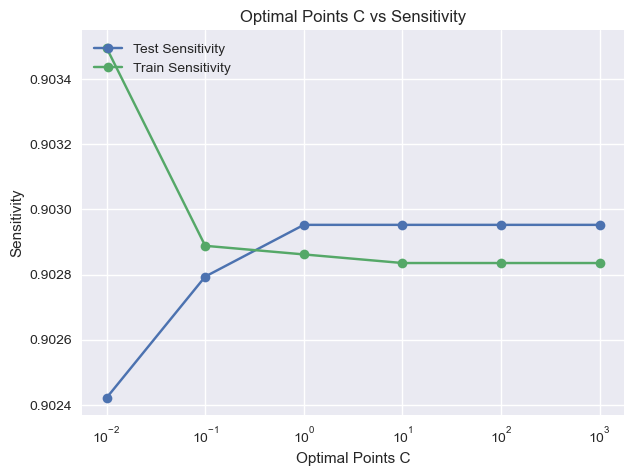

In [119]:
# Plot of tunning Results
plt.figure(figsize=(7, 5))
plt.plot(tunning_results['param_C'], tunning_results['mean_test_score'], marker='o')
plt.plot(tunning_results['param_C'], tunning_results['mean_train_score'], marker='o')
plt.xscale('log')
plt.xlabel('Optimal Points C')
plt.ylabel('Sensitivity')
plt.legend(['Test Sensitivity', 'Train Sensitivity'], loc='upper left')
plt.title('Optimal Points C vs Sensitivity')
plt.show()

In [120]:
best_score = grid_search.best_score_
optimal_point= grid_search.best_params_['C']
print(" The highest test sensitivity is {0} at Optimal C = {1}".format(best_score, optimal_point))

 The highest test sensitivity is 0.9029527776119736 at Optimal C = 1


### Building Logistic Regression at best estimator

In [121]:
log_reg = LogisticRegression(C=optimal_point)
log_reg_model = log_reg.fit(PCA_x_train, y_train)
log_reg_model

LogisticRegression(C=1)

### PREDICTION

In [122]:
# train set Predictions
y_train_pred = log_reg_model.predict(PCA_x_train)
y_train_pred

array([0, 0, 1, ..., 1, 0, 1])

In [123]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_train, y_train_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_train, y_train_pred))

Confusion_matrix:
[[16516  2416]
 [ 1838 17094]] 

Accuracy : 0.887650538770336
False Positive Rate : 0.12761462074794
Positive Predictive Value : 0.8761660686827268
Negative predictive value : 0.8998583415059388
Sensitivity :  0.9029156982886118
Specificity :  0.8723853792520601
Precision: 0.88
Recall: 0.90
F1_Score: 0.8893397846105823


### Test Data Predications

In [124]:
## Test Data Predication
y_test_pred = log_reg_model.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [125]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives


print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_test, y_test_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_test, y_test_pred))

Confusion_matrix:
[[7143  967]
 [  45  243]] 

Accuracy : 0.8794951178852107
False Positive Rate : 0.11923551171393341
Positive Predictive Value : 0.20082644628099172
Negative predictive value : 0.9937395659432388
Sensitivity :  0.84375
Specificity :  0.8807644882860666
Precision: 0.20
Recall: 0.84
F1_Score: 0.32443257676902537


### Model Summary

In [126]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['LogisticRegression_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['LogisticRegression_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_b = pd.concat([train_df, test_df], axis=0)
results_b.set_index('Model', inplace=True)
results_b

Accuracy  Sensitivity  Specificity
Model                                                                     
LogisticRegression_TRAIN_DATA with PCA  0.887651     0.902916     0.872385
LogisticRegression_TEST_DATA with PCA   0.879495     0.843750     0.880764

## 3) Decision Tree

### Hypertunning

In [127]:
params = {
    "max_depth": [2, 3, 5, 10, 20],
    'min_samples_split': [5, 10, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100],
}

DecisionTree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=DecisionTree,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")
grid_search.fit(PCA_x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 50, 100]},
             scoring='accuracy', verbose=1)

In [128]:
# Results
tunning_results_dt = pd.DataFrame(grid_search.cv_results_)
tunning_results_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.879493      0.010761         0.004000    4.000008e-03   
1       0.866262      0.011832         0.004000    3.999949e-03   
2       0.871920      0.021907         0.006001    3.464883e-03   
3       0.959913      0.011313         0.015997    7.999182e-03   
4       0.941915      0.022889         0.007999    2.598106e-07   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               2                      5                       5   
1               2                      5                      10   
2               2                      5                      50   
3               2                      5                     100   
4               2                     10                       5   

                                              params  split0_test_score  \
0  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.81872   
1  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.81872   
2  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.81872   
3  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...            0.81872   
4  {'max_depth': 2, 'min_samples_leaf': 10, 'min_...            0.81872   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.815445           0.825375           0.819987         0.819882   
1           0.815445           0.825375           0.819987         0.819882   
2           0.815445           0.825375           0.819987         0.819882   
3           0.815445           0.825375           0.819987         0.819882   
4           0.815445           0.825375           0.819987         0.819882   

   std_test_score  rank_test_score  
0        0.003579               81  
1        0.003579               81  
2        0.003579               81  
3        0.003579               81  
4        0.003579               81

In [129]:
## Best score
print ('Best sensitivity',grid_search.best_score_)

## Best estimator
Best_estimator = grid_search.best_estimator_
print (Best_estimator)

Best sensitivity 0.9273452355799705
DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)


### Decision Tree with best Hypertunned Estimator

In [130]:
Decision_Tree_Final= DecisionTreeClassifier(max_depth=20,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            random_state=42)
Decision_Tree_Final.fit(PCA_x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

### Predictions

In [131]:
# train set Predictions
y_train_pred = Decision_Tree_Final.predict(PCA_x_train)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [132]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_train, y_train_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_train, y_train_pred))

Confusion_matrix:
[[18236   696]
 [  346 18586]] 

Accuracy : 0.9724804563701669
False Positive Rate : 0.03676315233467146
Positive Predictive Value : 0.9639041593195726
Negative predictive value : 0.9813798299429556
Sensitivity :  0.9817240650750053
Specificity :  0.9632368476653286
Precision: 0.96
Recall: 0.98
F1_Score: 0.9727325064112629


### Test Data Predications

In [133]:
y_test_pred = Decision_Tree_Final.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [134]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives


print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_test, y_test_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_test, y_test_pred))

Confusion_matrix:
[[7464  646]
 [ 137  151]] 

Accuracy : 0.9067635151226483
False Positive Rate : 0.07965474722564735
Positive Predictive Value : 0.18946047678795483
Negative predictive value : 0.981976055782134
Sensitivity :  0.5243055555555556
Specificity :  0.9203452527743526
Precision: 0.19
Recall: 0.52
F1_Score: 0.2783410138248848


### Model Summary

In [135]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['DecisionTree_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['DecisionTree_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_c = pd.concat([train_df, test_df], axis=0)
results_c.set_index('Model', inplace=True)
results_c

Accuracy  Sensitivity  Specificity
Model                                                               
DecisionTree_TRAIN_DATA with PCA  0.972480     0.981724     0.963237
DecisionTree_TEST_DATA with PCA   0.906764     0.524306     0.920345

## 4) Random Forest Classifer

### Hypertunning

In [136]:
# Create the model
params = ({'n_estimators':[10, 25, 50, 100],
                     'max_depth':[2, 3, 5, 10, 20, 30],
                     'max_leaf_nodes':[5, 10, 20, 50, 100]})


model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")
grid_search.fit(PCA_x_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'max_leaf_nodes': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [137]:
# Results
tunning_results_rf = pd.DataFrame(grid_search.cv_results_)
tunning_results_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.757933      0.006634         0.021998        0.006631   
1       1.873830      0.008717         0.039997        0.000001   
2       3.601984      0.026755         0.067993        0.003999   
3       7.303376      0.057540         0.132804        0.007812   
4       0.773385      0.007813         0.015624        0.000001   

  param_max_depth param_max_leaf_nodes param_n_estimators  \
0               2                    5                 10   
1               2                    5                 25   
2               2                    5                 50   
3               2                    5                100   
4               2                   10                 10   

                                              params  split0_test_score  \
0  {'max_depth': 2, 'max_leaf_nodes': 5, 'n_estim...           0.832453   
1  {'max_depth': 2, 'max_leaf_nodes': 5, 'n_estim...           0.836045   
2  {'max_depth': 2, 'max_leaf_nodes': 5, 'n_estim...           0.838791   
3  {'max_depth': 2, 'max_leaf_nodes': 5, 'n_estim...           0.836996   
4  {'max_depth': 2, 'max_leaf_nodes': 10, 'n_esti...           0.832453   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.831502           0.835517           0.832664         0.833034   
1           0.833087           0.838475           0.844602         0.838052   
2           0.835200           0.841961           0.839320         0.838818   
3           0.836362           0.848616           0.837735         0.839927   
4           0.831502           0.835517           0.832664         0.833034   

   std_test_score  rank_test_score  
0        0.001499              116  
1        0.004236              106  
2        0.002409              101  
3        0.005040               96  
4        0.001499              116

In [138]:
## Best score
print ('Best sensitivity',grid_search.best_score_)

## Best estimator
Best_estimator = grid_search.best_estimator_
print (Best_estimator)

Best sensitivity 0.917784703148109
RandomForestClassifier(max_depth=20, max_leaf_nodes=100, random_state=42)


### Predications

In [139]:
# train set Predictions
y_train_pred = Best_estimator.predict(PCA_x_train)
y_train_pred

array([0, 0, 1, ..., 1, 0, 1])

In [140]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_train, y_train_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_train, y_train_pred))

Confusion_matrix:
[[17484  1448]
 [ 1227 17705]] 

Accuracy : 0.9293524191844497
False Positive Rate : 0.07648425945489119
Positive Predictive Value : 0.9243982665900903
Negative predictive value : 0.9344236010902678
Sensitivity :  0.9351890978237904
Specificity :  0.9235157405451088
Precision: 0.92
Recall: 0.94
F1_Score: 0.9297623736379153


### Test Data Predications

In [141]:
y_test_pred = Best_estimator.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [142]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives


print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_test, y_test_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_test, y_test_pred))

Confusion_matrix:
[[7473  637]
 [  99  189]] 

Accuracy : 0.9123600857346987
False Positive Rate : 0.07854500616522811
Positive Predictive Value : 0.2288135593220339
Negative predictive value : 0.9869255150554676
Sensitivity :  0.65625
Specificity :  0.9214549938347719
Precision: 0.23
Recall: 0.66
F1_Score: 0.3393177737881508


### Model Summary

In [143]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['RandomForest_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['RandomForest_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_d = pd.concat([train_df, test_df], axis=0)
results_d.set_index('Model', inplace=True)
results_d

Accuracy  Sensitivity  Specificity
Model                                                               
RandomForest_TRAIN_DATA with PCA  0.929352     0.935189     0.923516
RandomForest_TEST_DATA with PCA   0.912360     0.656250     0.921455

## 5) BAGGING Classifier

In [144]:
model_bagging = BaggingClassifier(base_estimator = Best_estimator)
model_bagging.fit (PCA_x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                        max_leaf_nodes=100,
                                                        random_state=42))

### Predications

In [145]:
# train set Predictions
y_train_pred = model_bagging.predict(PCA_x_train)
y_train_pred

array([0, 0, 1, ..., 1, 0, 1])

In [146]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives


print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_train, y_train_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_train, y_train_pred))

Confusion_matrix:
[[17479  1453]
 [ 1322 17610]] 

Accuracy : 0.9267113881259244
False Positive Rate : 0.07674836256074372
Positive Predictive Value : 0.9237790484184022
Negative predictive value : 0.9296845912451466
Sensitivity :  0.9301711388125924
Specificity :  0.9232516374392563
Precision: 0.92
Recall: 0.93
F1_Score: 0.9269640742202923


### Test Data Predications

In [147]:
y_test_pred = model_bagging.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [148]:
### All Metrics
Confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
TP = Confusion_matrix[1,1] # true positive
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives


print('Confusion_matrix:')
print (Confusion_matrix, '\n')
print('Accuracy :',metrics.accuracy_score( y_test, y_test_pred))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('F1_Score:', f1_score(y_test, y_test_pred))

Confusion_matrix:
[[7478  632]
 [ 100  188]] 

Accuracy : 0.9128363896165754
False Positive Rate : 0.0779284833538841
Positive Predictive Value : 0.22926829268292684
Negative predictive value : 0.9868039060438111
Sensitivity :  0.6527777777777778
Specificity :  0.9220715166461159
Precision: 0.23
Recall: 0.65
F1_Score: 0.33935018050541516


### Model Summary

In [149]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['BaggingClassifier_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['BaggingClassifer_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_e = pd.concat([train_df, test_df], axis=0)
results_e.set_index('Model', inplace=True)
results_e

Accuracy  Sensitivity  Specificity
Model                                                                    
BaggingClassifier_TRAIN_DATA with PCA  0.926711     0.930171     0.923252
BaggingClassifer_TEST_DATA with PCA    0.912836     0.652778     0.922072

## 6) AdaBoost Classifier

In [150]:
model_AdaBoostClassifier = AdaBoostClassifier(base_estimator = Best_estimator)
model_AdaBoostClassifier.fit (PCA_x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                         max_leaf_nodes=100,
                                                         random_state=42))

### Predications

In [151]:
# train set Predictions
y_train_pred = model_AdaBoostClassifier.predict(PCA_x_train)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

### Test Data Predications

In [152]:
## Test Predications
y_test_pred = model_AdaBoostClassifier.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

### Model Summary

In [153]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['AdaBoostClassifier_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['AdaBoostClassifier_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_f = pd.concat([train_df, test_df], axis=0)
results_f.set_index('Model', inplace=True)
results_f

Accuracy  Sensitivity  Specificity
Model                                                                     
AdaBoostClassifier_TRAIN_DATA with PCA  1.000000     1.000000     1.000000
AdaBoostClassifier_TEST_DATA with PCA   0.958681     0.423611     0.977682

## 7) Stacking Ensemble

In [154]:
### initialize an empty
empty = []

### Appending models to the list
model_1 = LogisticRegression()
empty.append(('logreg', model_1))

model_2 = SVC()
empty.append(('svm', model_2))

model_3 = DecisionTreeClassifier()
empty.append(('dtree',model_3))

len(empty)

3

In [155]:
### Building model
VotingClassifier = VotingClassifier(empty)
VotingClassifier.fit(PCA_x_train,y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()), ('svm', SVC()),
                             ('dtree', DecisionTreeClassifier())])

### Predictions

In [156]:
# train set Predictions
y_train_pred = VotingClassifier.predict(PCA_x_train)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

### Test Data Predications

In [157]:
## Test Predications
y_test_pred = VotingClassifier.predict(PCA_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

### Model Summary

In [158]:
Confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
Confusion_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred)

train_data = {
    'Model': ['VotingClassifier_TRAIN_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_train, y_train_pred)],
    'Sensitivity': [Confusion_matrix[1, 1] / float(Confusion_matrix[1, 1] + Confusion_matrix[1, 0])],
    'Specificity': [Confusion_matrix[0, 0] / float(Confusion_matrix[0, 0] + Confusion_matrix[0, 1])]
}

test_data = {
    'Model': ['VotingClassifier_TEST_DATA with PCA'],
    'Accuracy': [metrics.accuracy_score(y_test, y_test_pred)],
    'Sensitivity': [Confusion_matrix_1[1, 1] / float(Confusion_matrix_1[1, 1] + Confusion_matrix_1[1, 0])],
    'Specificity': [Confusion_matrix_1[0, 0] / float(Confusion_matrix_1[0, 0] + Confusion_matrix_1[0, 1])]
}
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
results_g = pd.concat([train_df, test_df], axis=0)
results_g.set_index('Model', inplace=True)
results_g

Accuracy  Sensitivity  Specificity
Model                                                                   
VotingClassifier_TRAIN_DATA with PCA  0.980192     0.997993     0.962392
VotingClassifier_TEST_DATA with PCA   0.931412     0.690972     0.939951

## Step-7) Conclusion

In [159]:
conclusion = pd.concat([results_A, results_b, results_c, results_d, results_e,results_f, results_g])
conclusion

Accuracy  Sensitivity  Specificity
Model                                                                     
LogisticRegression_TRAIN_DATA With RFE  0.881206     0.879094     0.883319
LogisticRegression_TEST_DATA With RFE   0.881877     0.829861     0.883724
LogisticRegression_TRAIN_DATA with PCA  0.887651     0.902916     0.872385
LogisticRegression_TEST_DATA with PCA   0.879495     0.843750     0.880764
DecisionTree_TRAIN_DATA with PCA        0.972480     0.981724     0.963237
DecisionTree_TEST_DATA with PCA         0.906764     0.524306     0.920345
RandomForest_TRAIN_DATA with PCA        0.929352     0.935189     0.923516
RandomForest_TEST_DATA with PCA         0.912360     0.656250     0.921455
BaggingClassifier_TRAIN_DATA with PCA   0.926711     0.930171     0.923252
BaggingClassifer_TEST_DATA with PCA     0.912836     0.652778     0.922072
AdaBoostClassifier_TRAIN_DATA with PCA  1.000000     1.000000     1.000000
AdaBoostClassifier_TEST_DATA with PCA   0.958681     0.423611     0.977682
VotingClassifier_TRAIN_DATA with PCA    0.980192     0.997993     0.962392
VotingClassifier_TEST_DATA with PCA     0.931412     0.690972     0.939951

> Overall, Random Forest and Bagging Classifier with PCA would be ideal models as they both provide good performance on the test data with balanced accuracy, sensitivity, and specificity, indicating robustness and generalisation capability.

> AdaBoostClassifier exhibits overfitting, as seen by its perfect sensitivity on the training dataset but a considerable decrease in sensitivity on the test dataset.

## Step-8) Business recomendation

### Top 7 Preditors

In [160]:
Features = model_fith.params.drop('const')
sorted_Features = Features.abs().sort_values(ascending=False)
print('Top 7 Preditors')
print(sorted_Features.head(7).index.tolist())

Top 7 Preditors
['loc_ic_mou_8', 'loc_og_t2m_mou_8', 'roam_og_mou_8', 'last_day_rch_amt_8', 'total_rech_num_8', 'monthly_3g_8', 'monthly_2g_8']


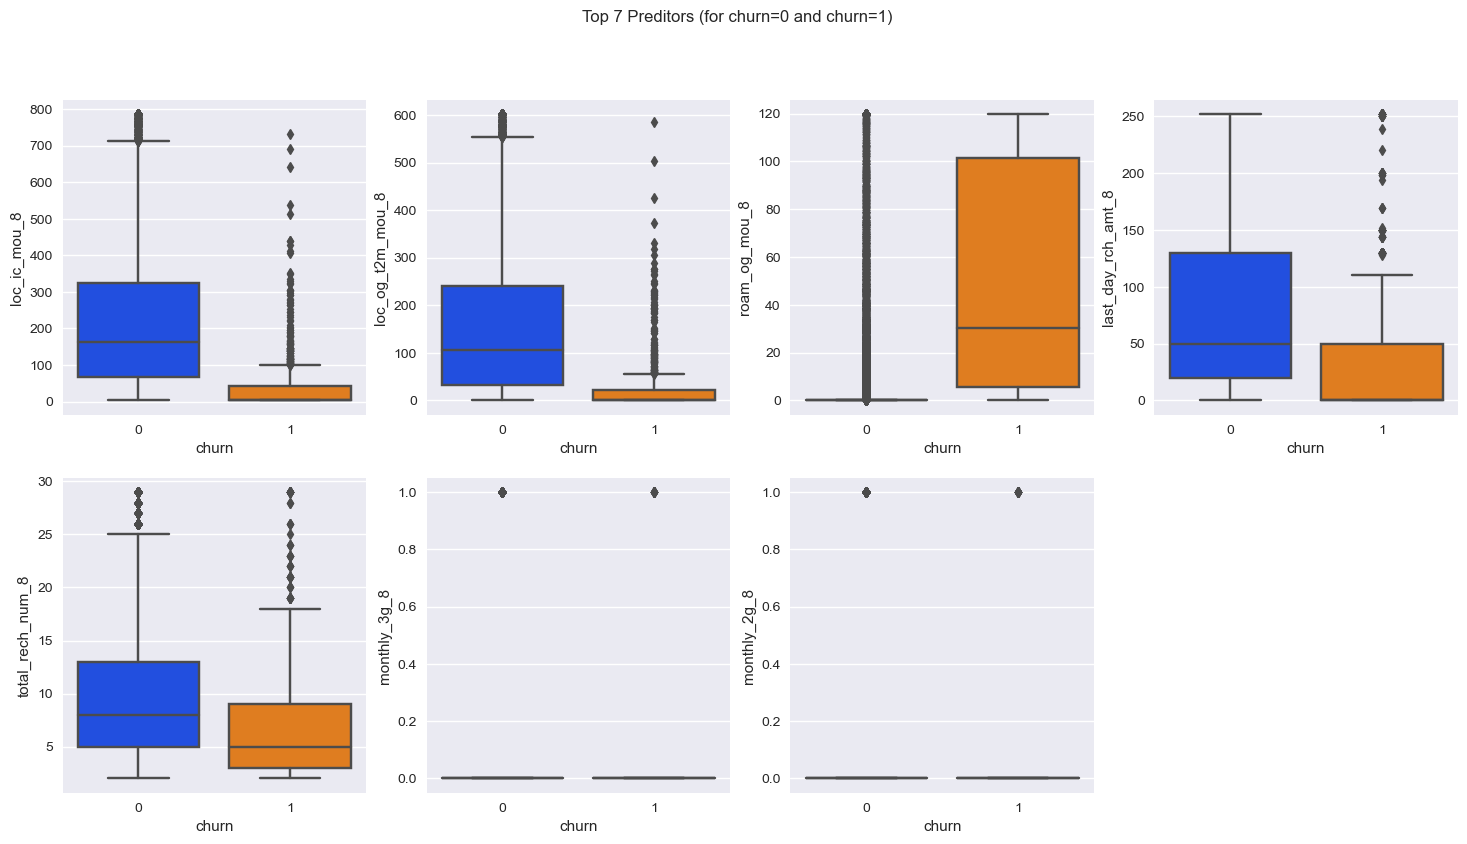

In [161]:
plt.figure(figsize=(18,9))

i = 1

for col in sorted_Features.head(7).index.tolist():
  plt.subplot(2, 4, i)
  sns.boxplot(data=Cleaning_df, x='churn', y=col, palette='bright')
  i = i+1

plt.suptitle('Top 7 Preditors (for churn=0 and churn=1)')
plt.show()

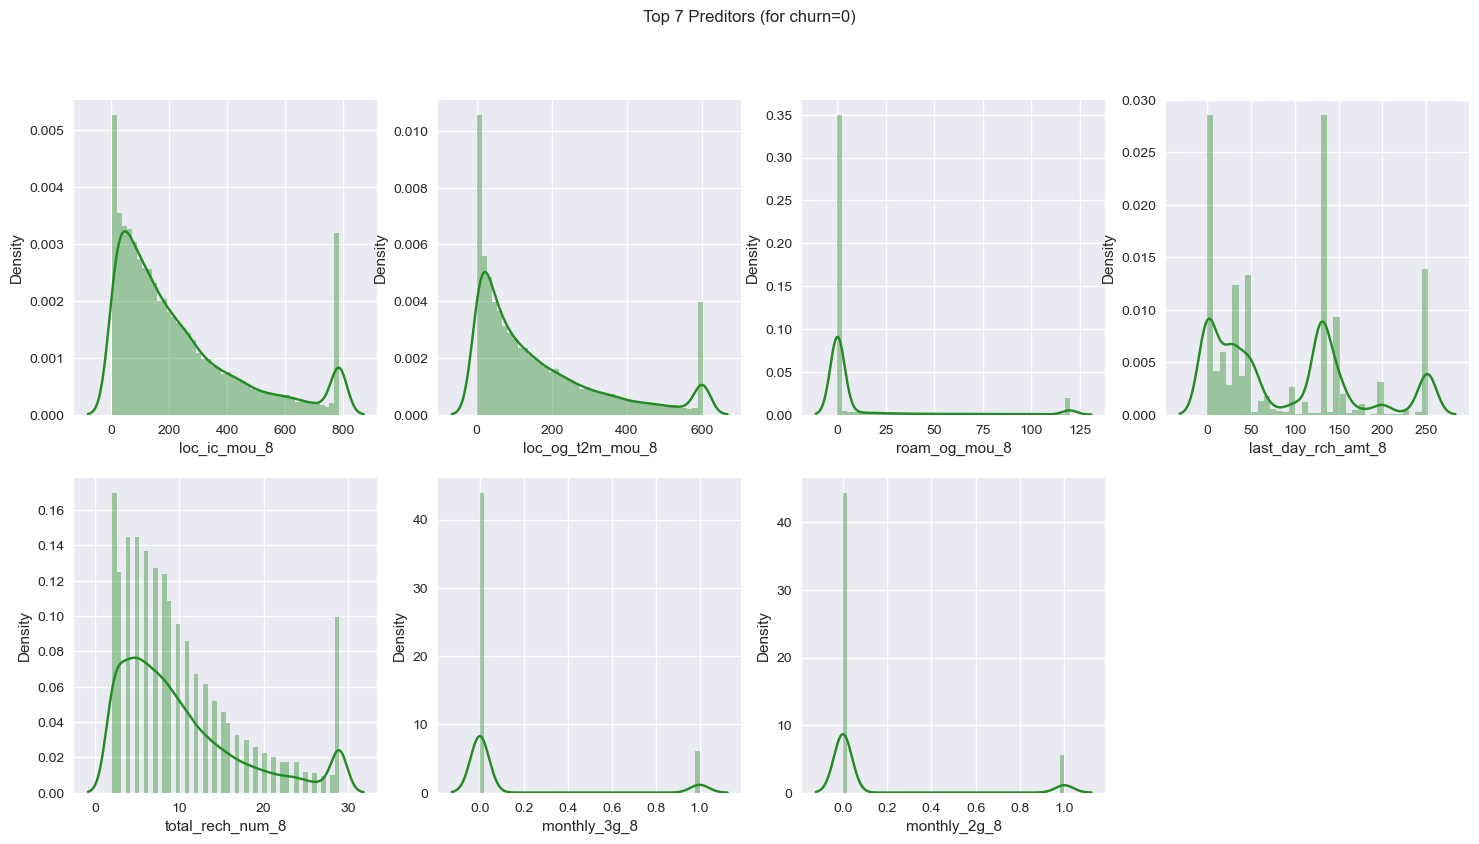

In [162]:
plt.figure(figsize=(18,9))

i = 1

for col in sorted_Features.head(7).index.tolist():
  plt.subplot(2, 4, i)
  sns.distplot(Cleaning_df[Cleaning_df['churn']==0][col], color='forestgreen')
  i = i+1

plt.suptitle('Top 7 Preditors (for churn=0)')

plt.show()

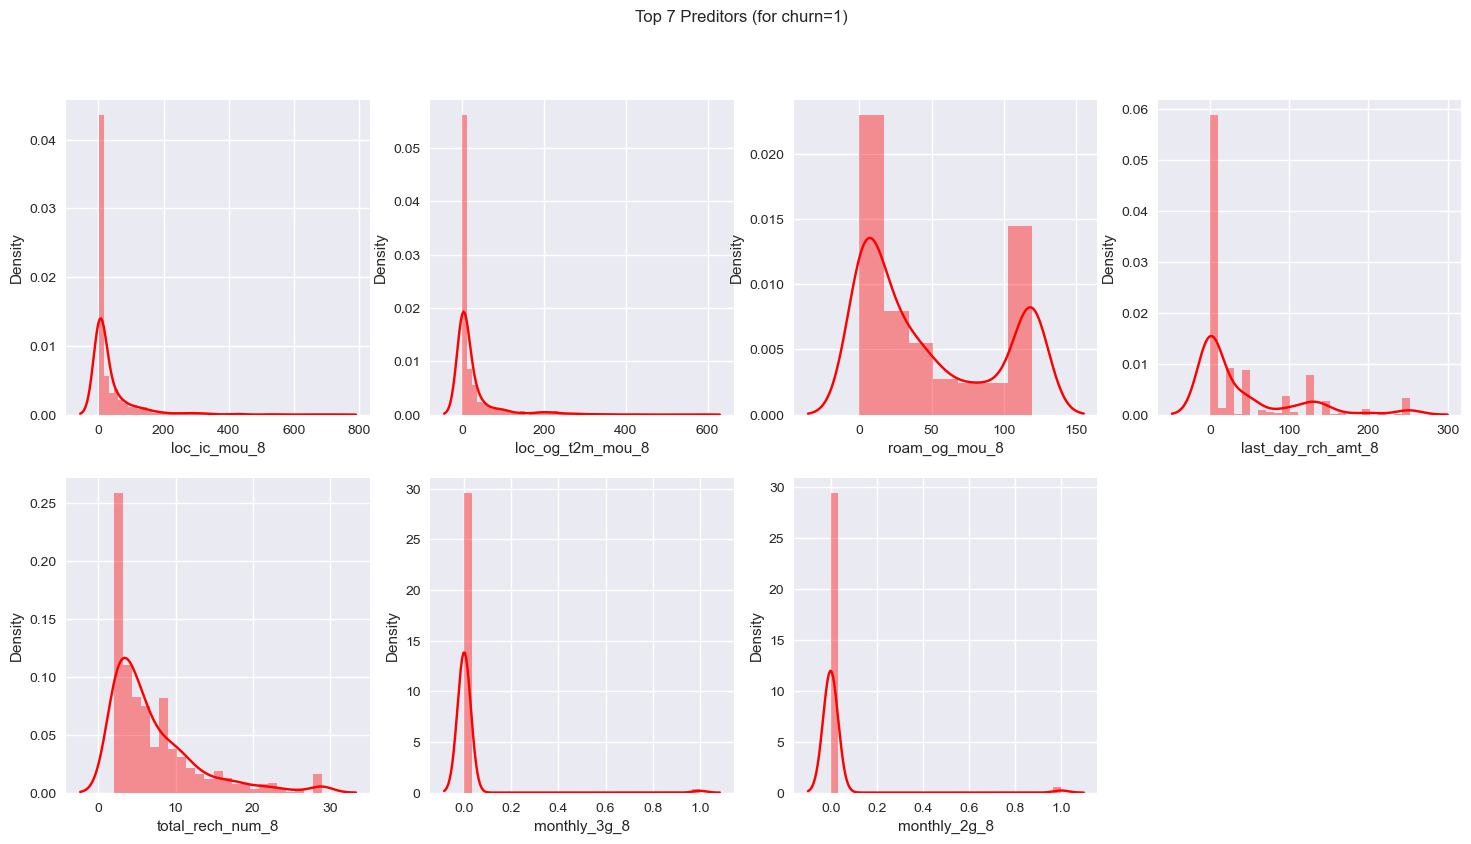

In [165]:
plt.figure(figsize=(18,9))

i = 1

for col in sorted_Features.head(7).index.tolist():
  plt.subplot(2, 4, i)
  sns.distplot(Cleaning_df[Cleaning_df['churn']==1][col], color='red')
  i = i+1

plt.suptitle('Top 7 Preditors (for churn=1)')

plt.show()

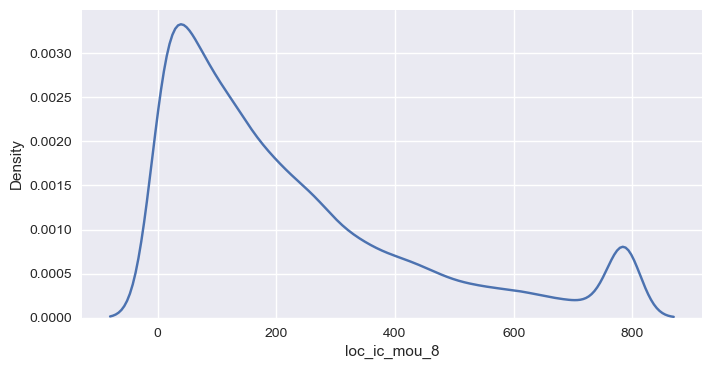

In [166]:
fig = plt.figure(figsize=(8,4))
sns.distplot(Cleaning_df['loc_ic_mou_8'],label='churn',hist=False)
plt.show()

> Most person spend less than 200 amount on Local calls - within same telecom circle in the month of August

### **Strategies/ Recomendations**

> ***There is a higher chance that the customer is likely to churn in the month of August.***

> ***MOU is one of the most important variables, but there are other aspects to consider that include data, in particular VBC, when the customer is not utilising a data pack.***

> ***Customers that remain a part of a network in lesser than four years ought to be periodically checked on, since data analysis indicates that they have a higher tendency to churn.***

> ***3G Customers who pay more in the month of August, have a high tendency to churned.***

> ***2G users in the month of August have a high tendency to churned due to decreasing 2g usage.***

> ***Prioritise User that have lower outgoing and incoming bills for July and August, respectively.***

> ***Users who recharges less than 200 throughout the years should be periodically check as they have high tendenacy to Churn.***